In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/df_selected_cols_exportado (1).csv')
df.head()

,id,host_id,latitude,longitude,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,beds,...,host_response_time,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type.1,room_type,first_review,last_review,instant_bookable,has_availability
0,3344,4957.0,38.90145,-77.02679,NaN,NaN,4.0,2.0,1.0,3.0,...,NaN,f,f,"Downtown, Chinatown, Penn Quarters, Mount Vern...",Entire condo,Entire home/apt,09/05/2009,31/08/2016,f,t
1,3686,4645.0,38.86339,-76.98889,90%,0%,4.0,1.0,1.0,2.0,...,within a few hours,f,t,Historic Anacostia,Private room in home,Private room,01/11/2010,30/08/2023,f,t
2,3943,5059.0,38.91195,-77.00456,100%,94%,5.0,2.0,1.0,1.0,...,within an hour,t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",Private room in townhouse,Private room,10/05/2009,27/05/2025,f,t
3,4197,5061.0,38.88719,-76.99472,100%,97%,2.0,1.0,1.5,1.0,...,within an hour,t,t,"Capitol Hill, Lincoln Park",Private room in home,Private room,14/05/2009,20/05/2025,f,t
4,4529,5803.0,38.90585,-76.94469,NaN,NaN,4.0,2.0,NaN,NaN,...,NaN,f,t,"Eastland Gardens, Kenilworth",Private room in home,Private room,08/08/2009,05/07/2019,f,t


In [7]:
df.dtypes

,0
id,int64
host_id,float64
latitude,float64
longitude,float64
host_response_rate,object
host_acceptance_rate,object
host_total_listings_count,float64
accommodates,float64
bathrooms,float64
beds,float64


Box plots before outlier treatment:


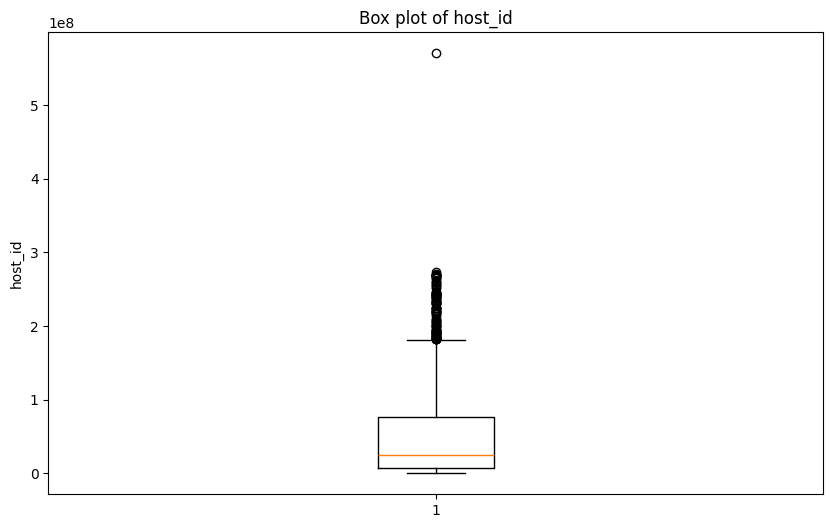

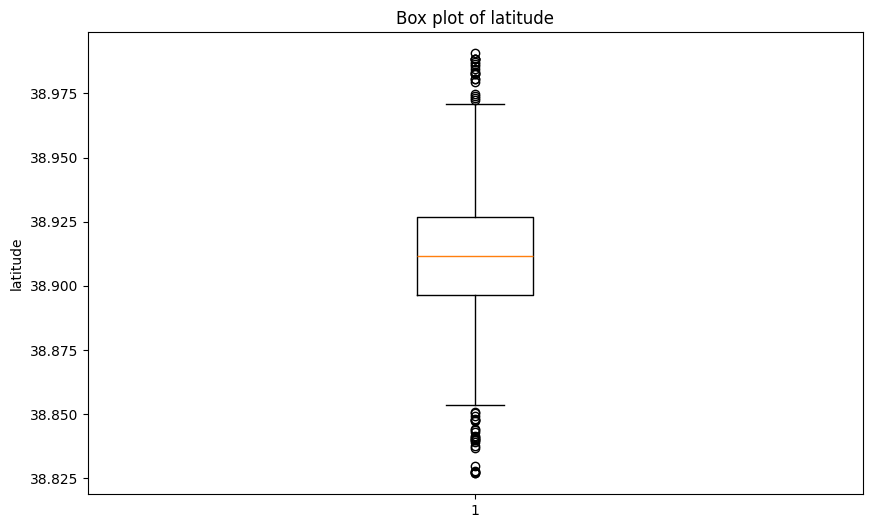

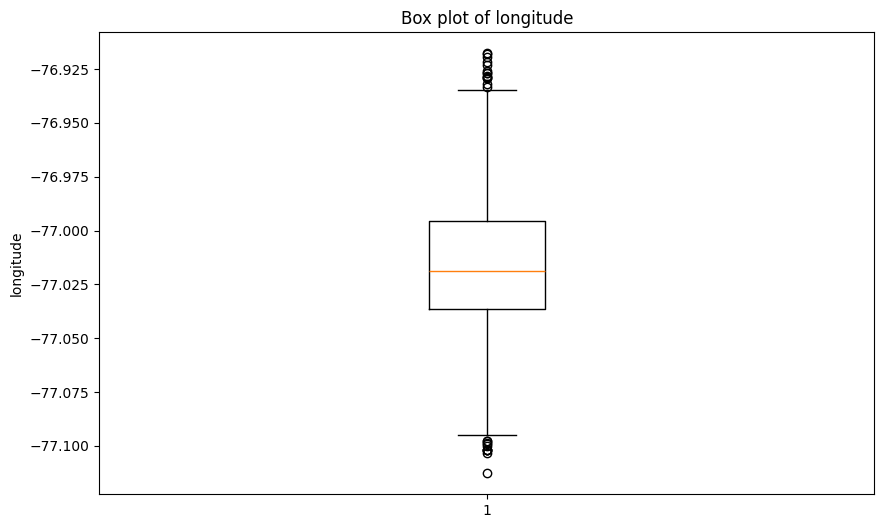

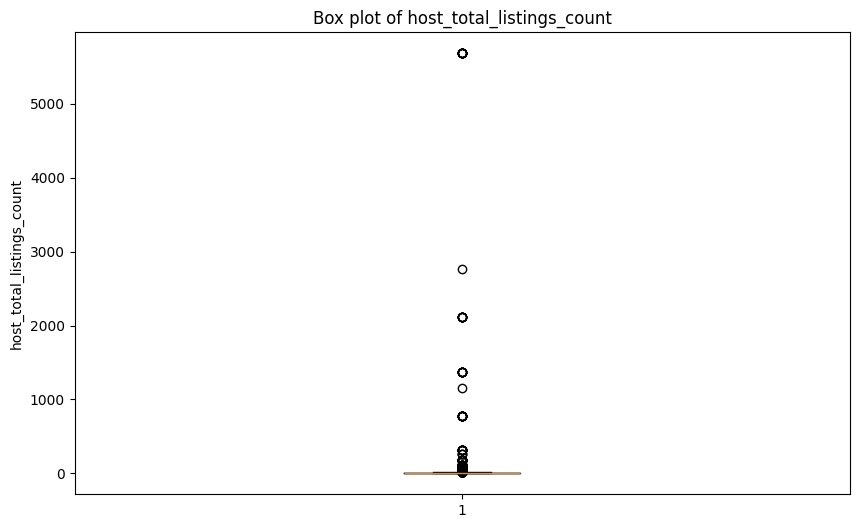

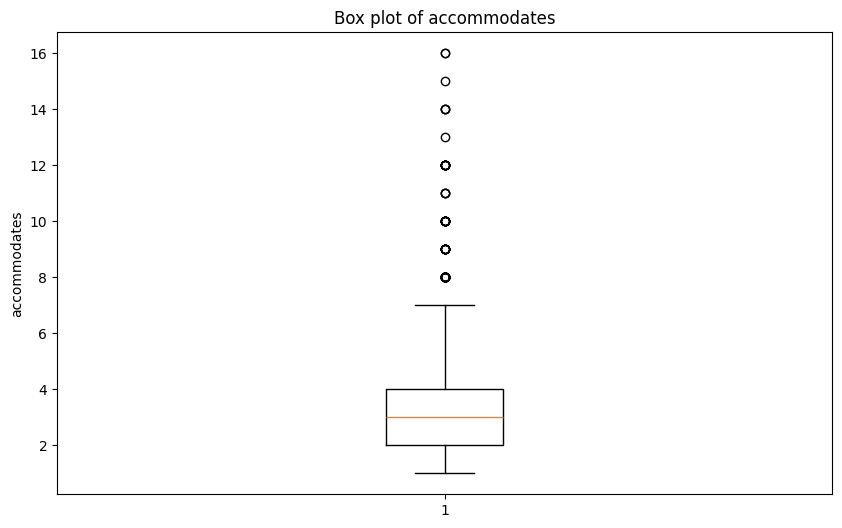

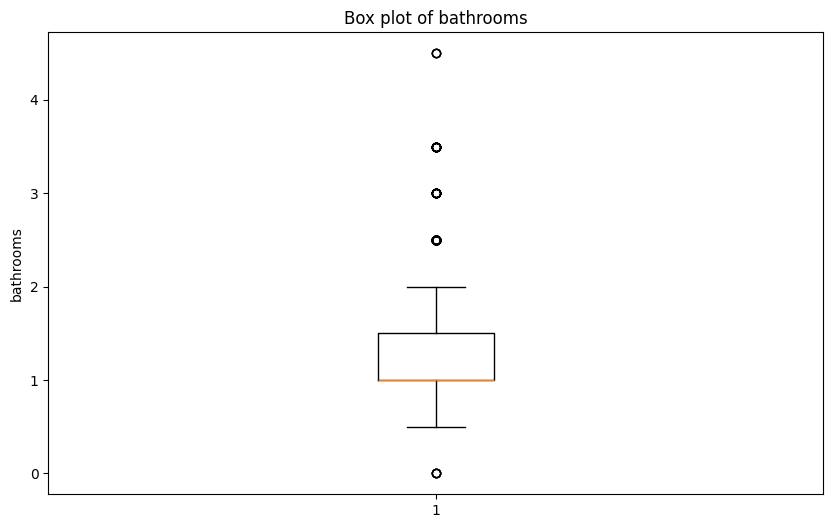

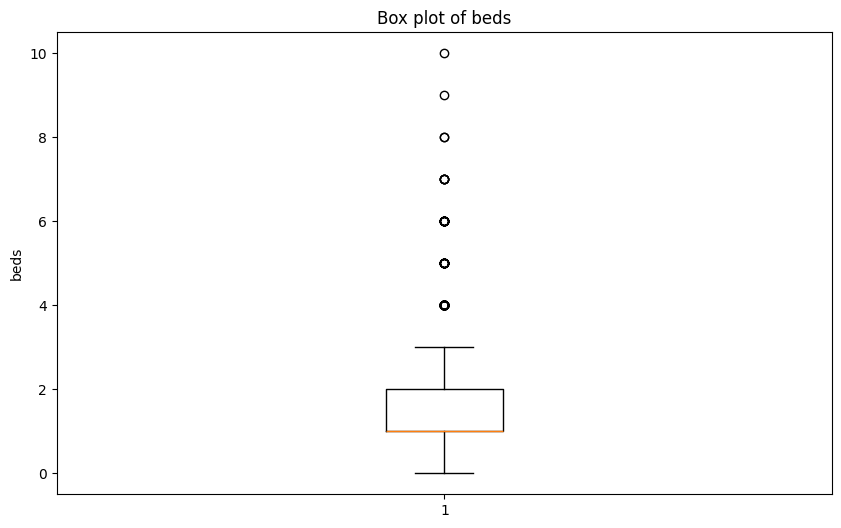

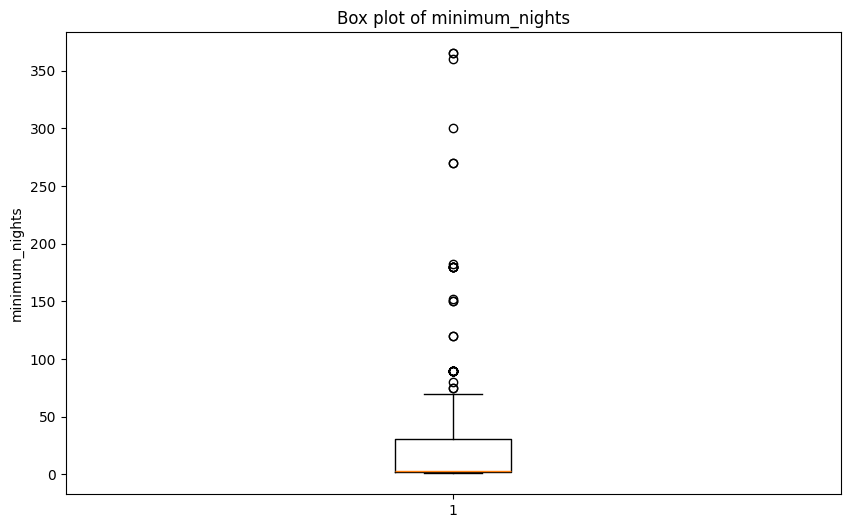

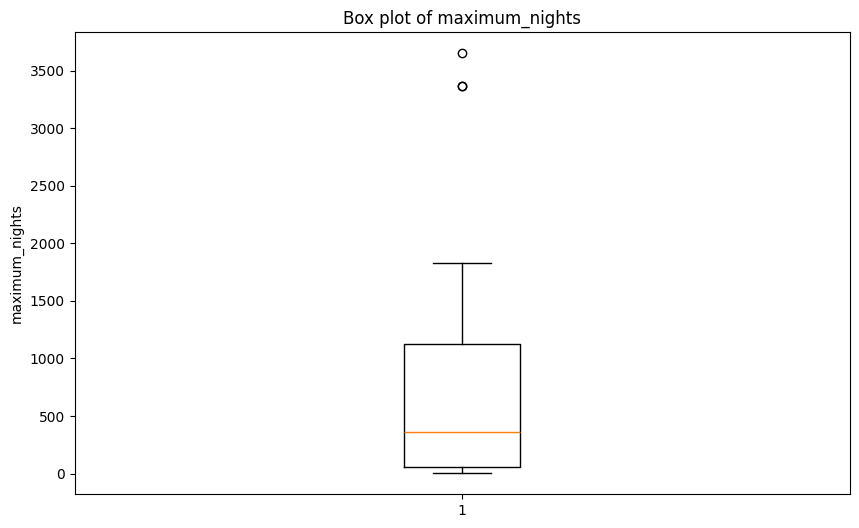

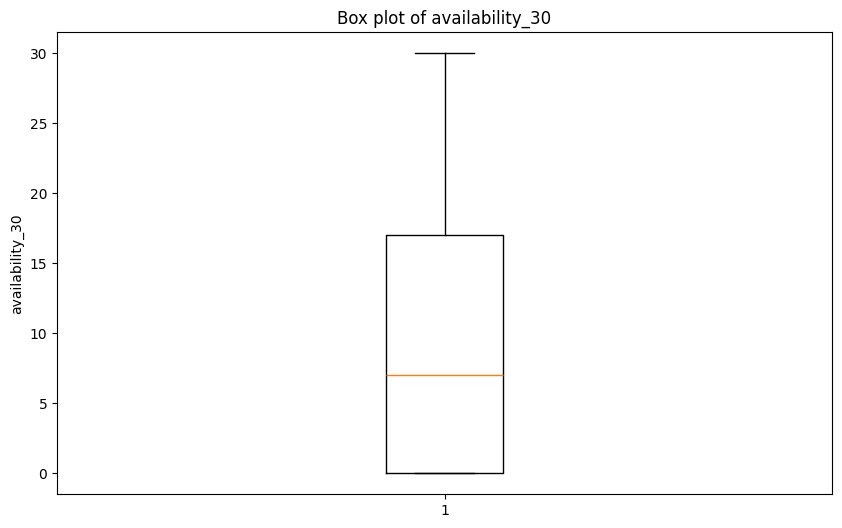

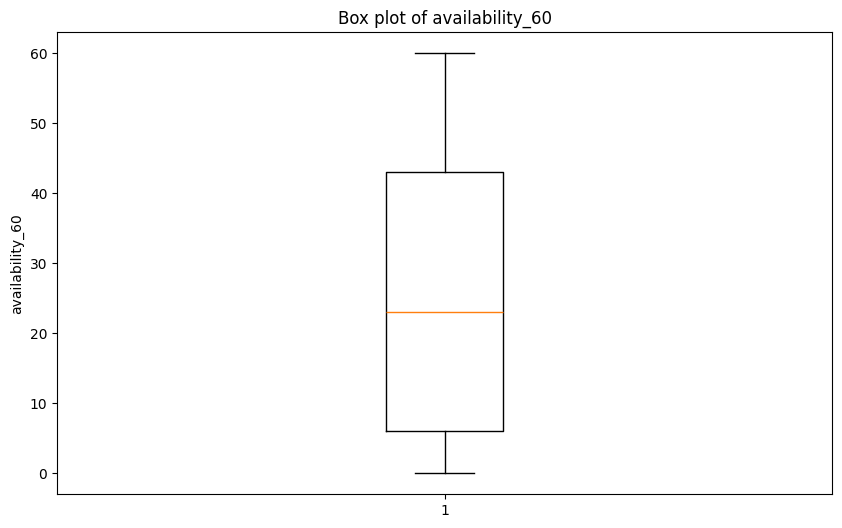

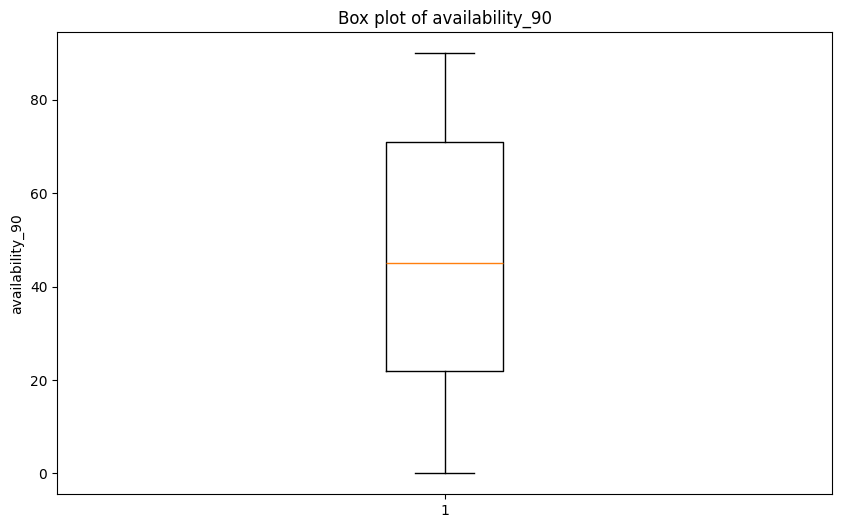

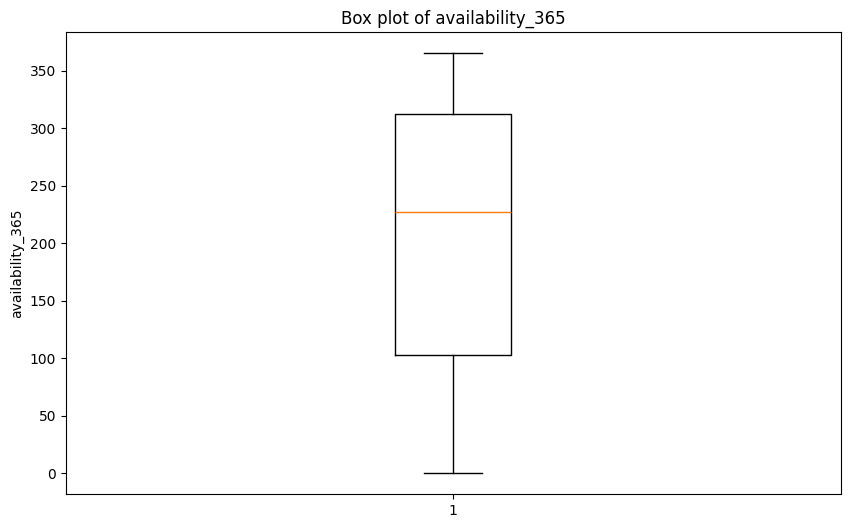

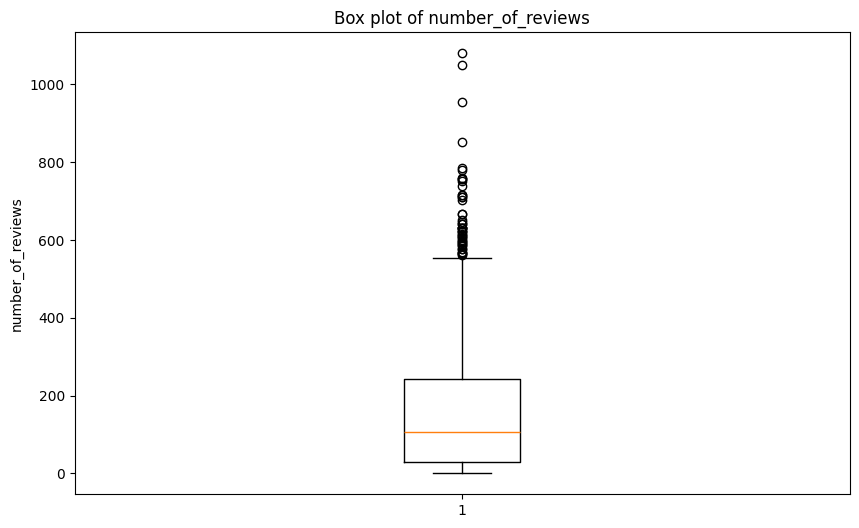

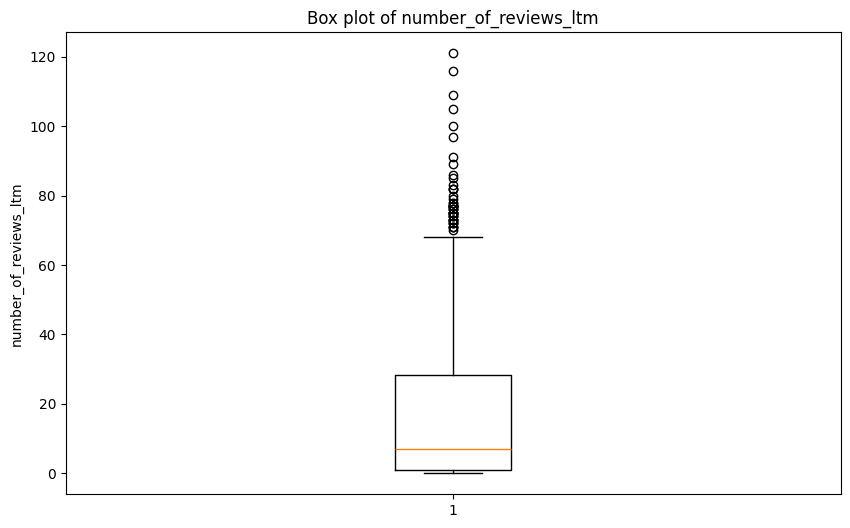

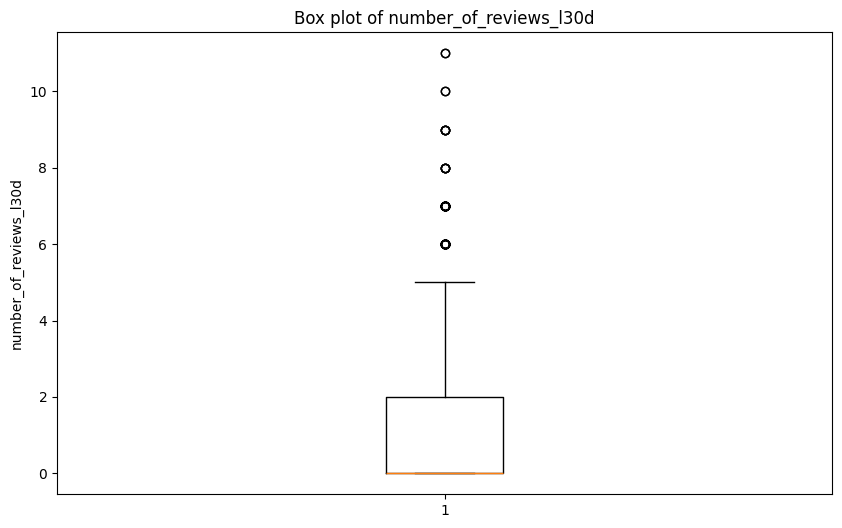

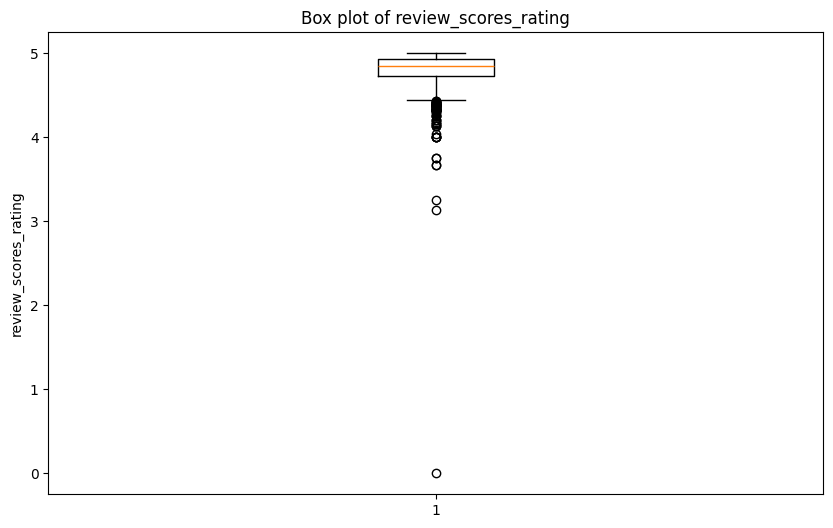

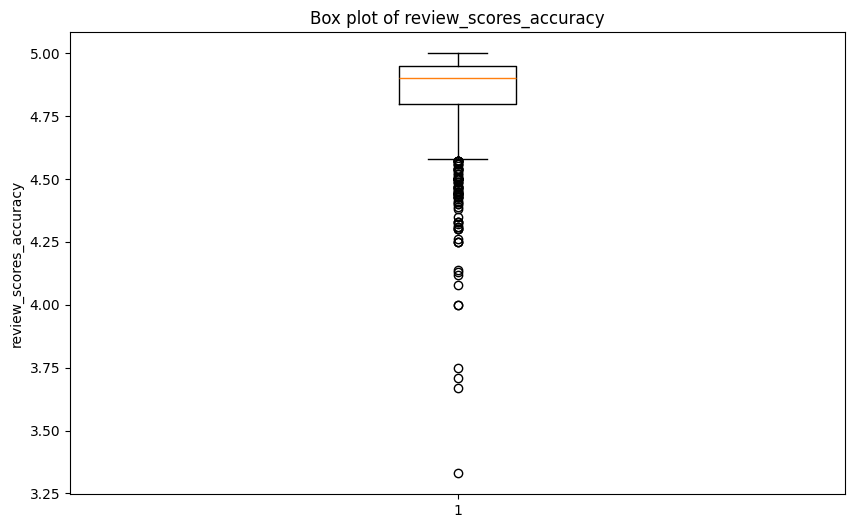

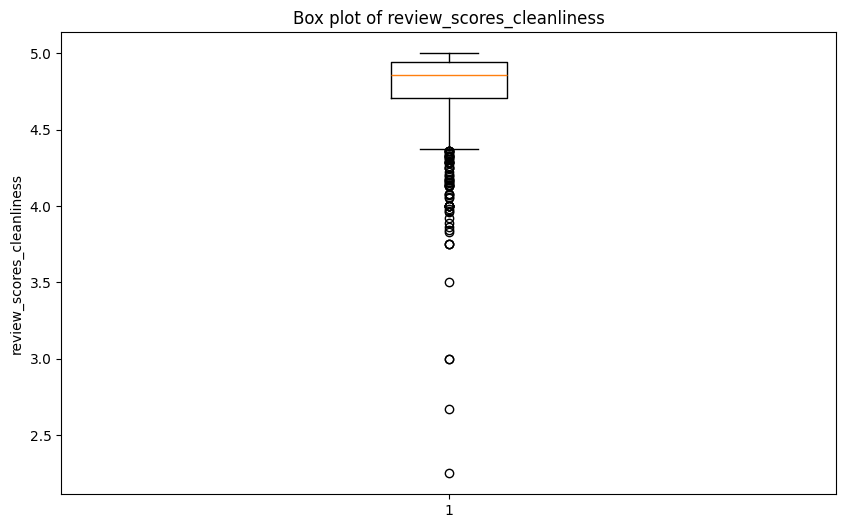

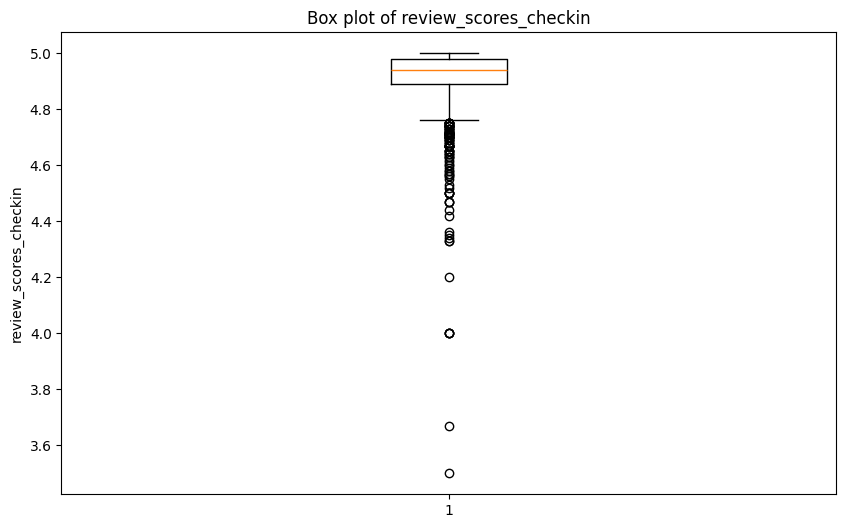

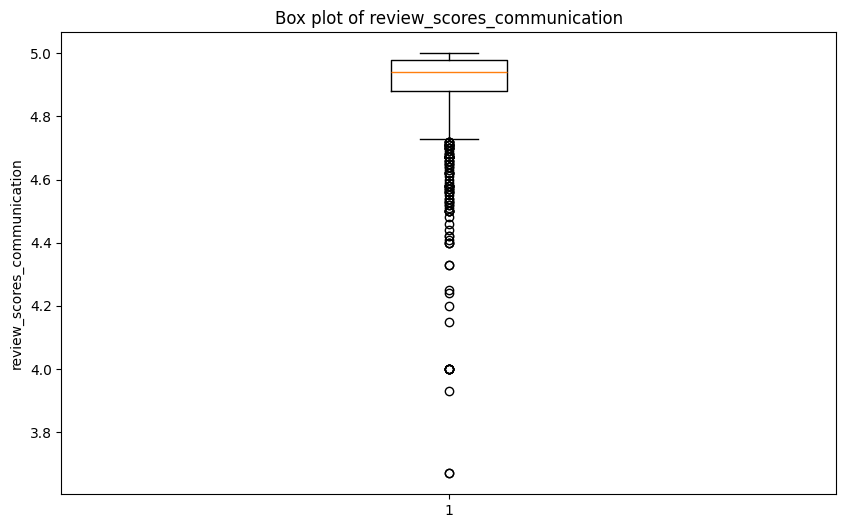

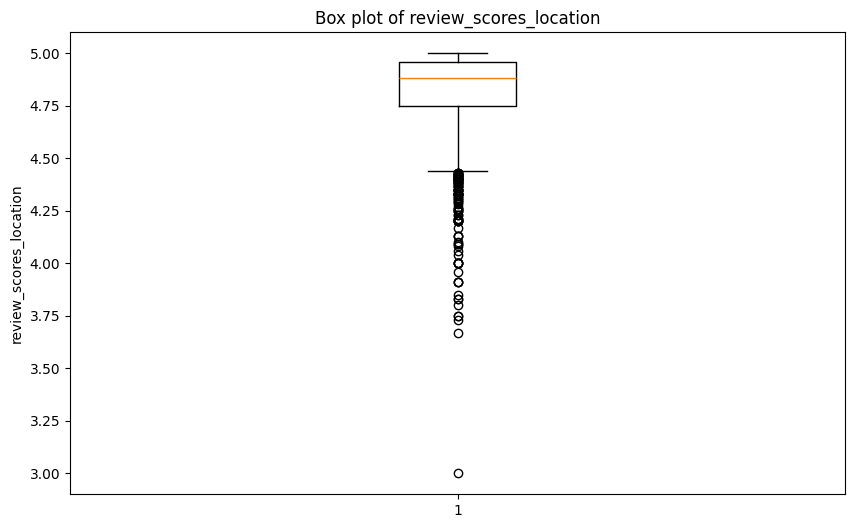

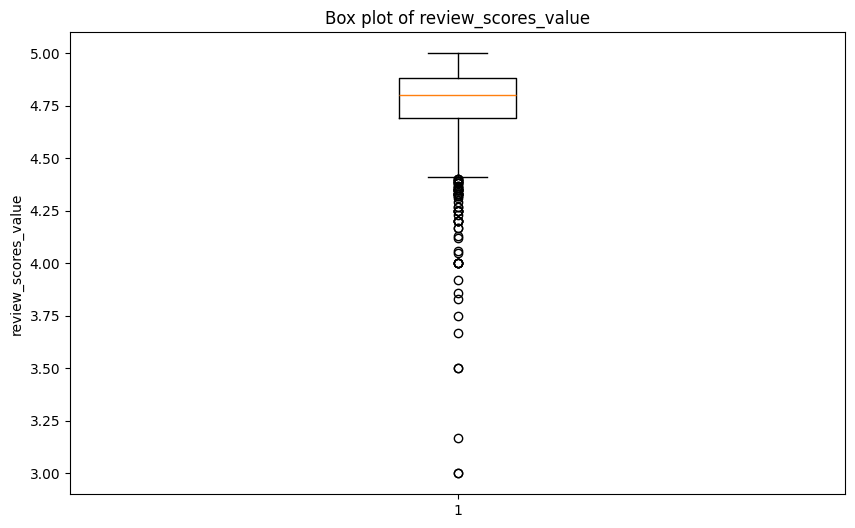

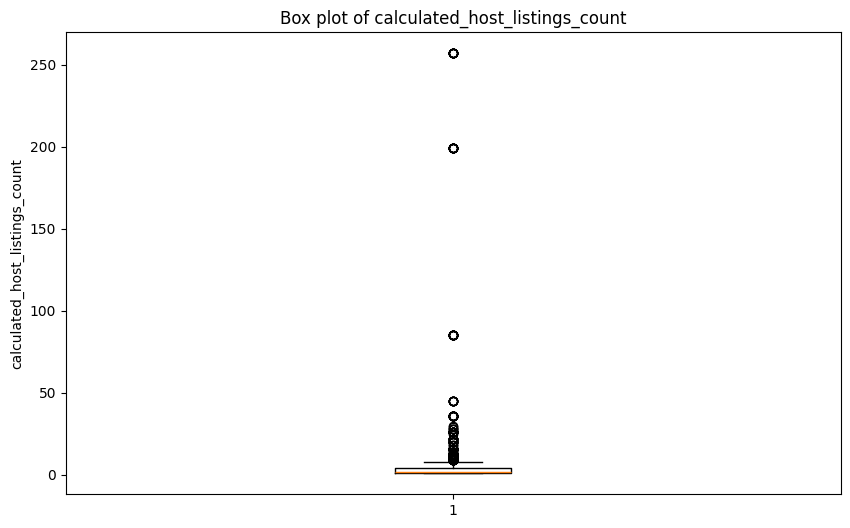

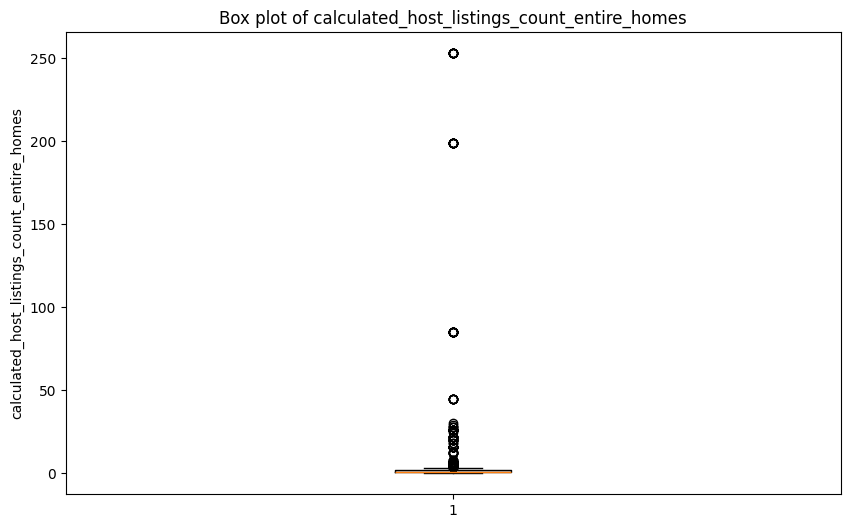

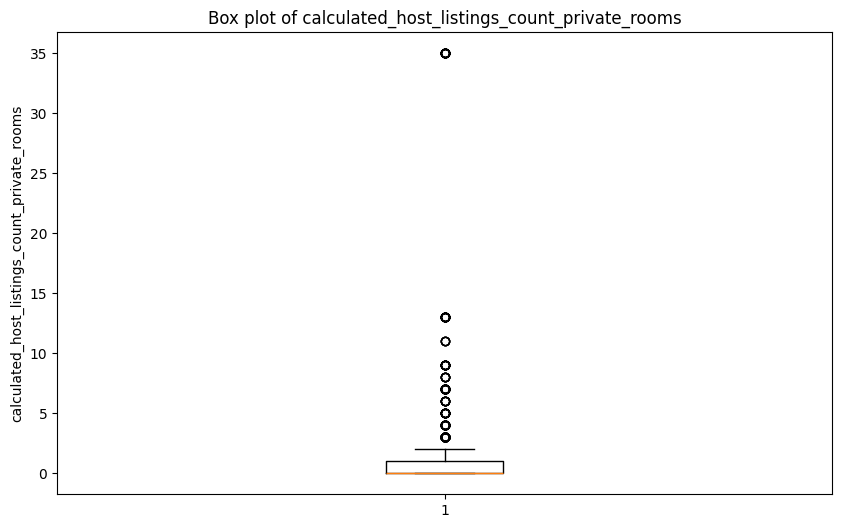

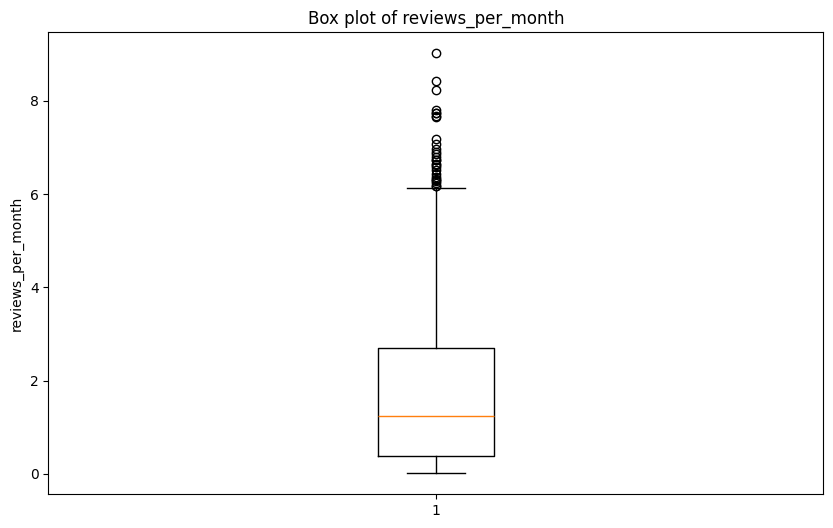

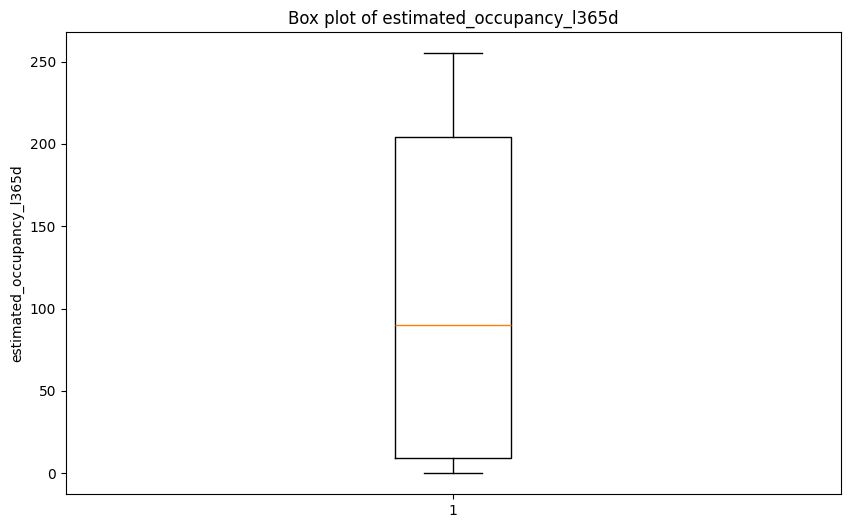

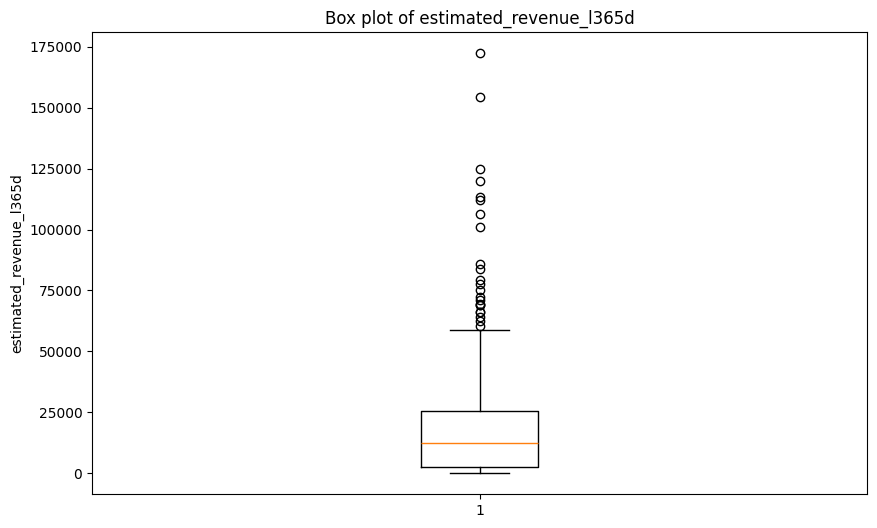

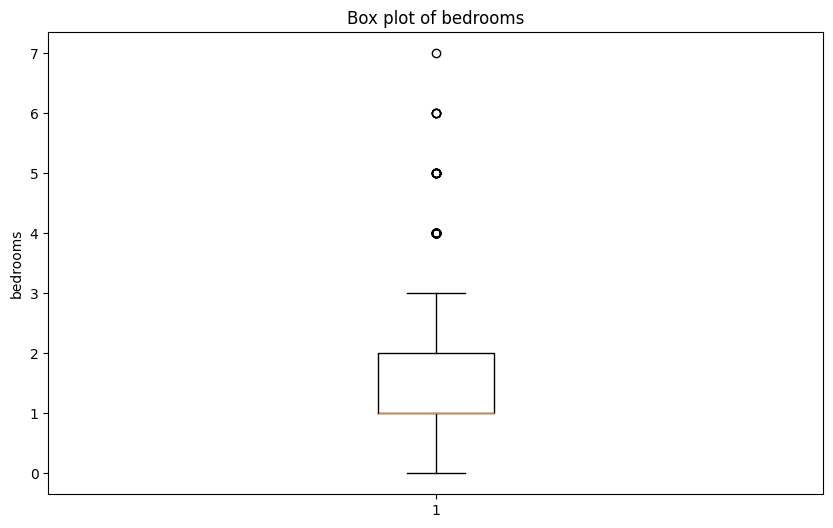

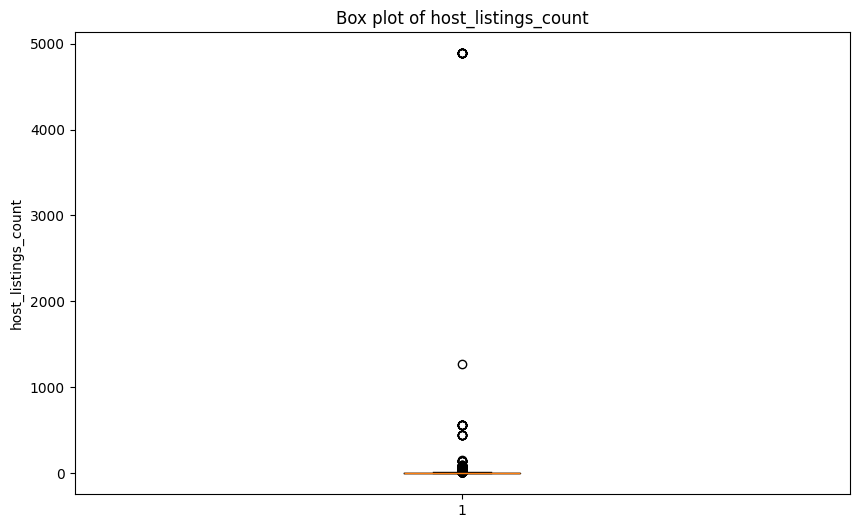

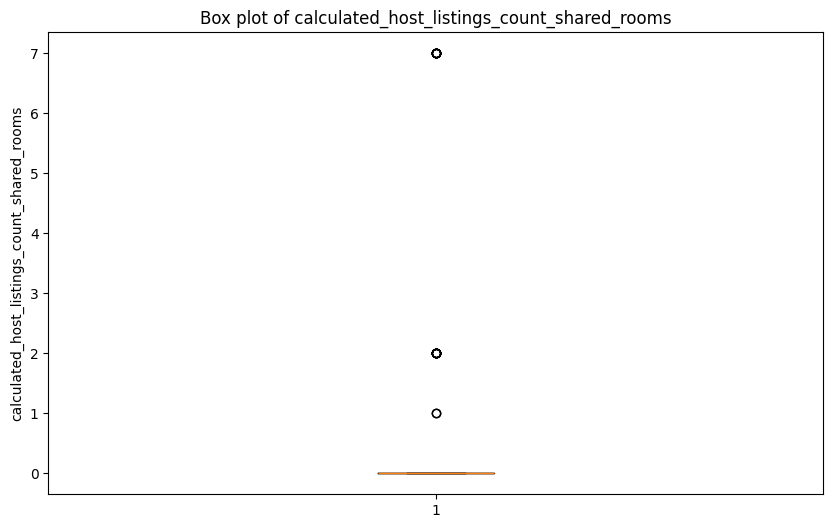

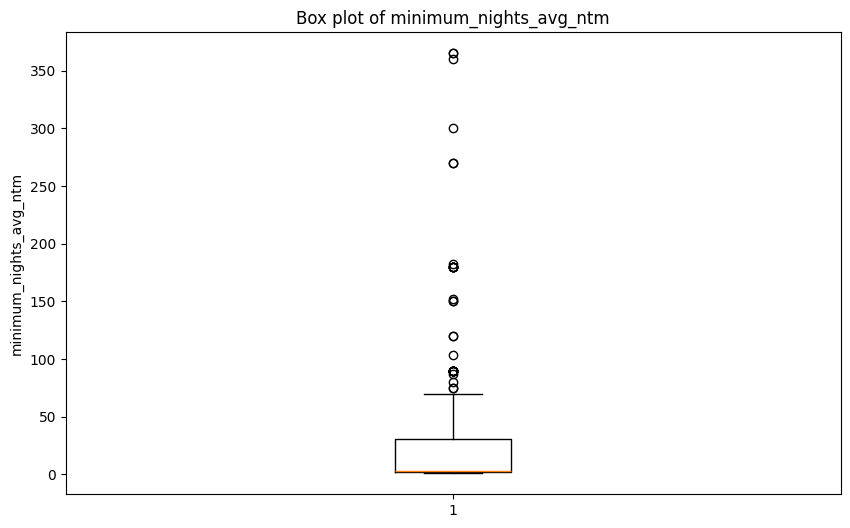

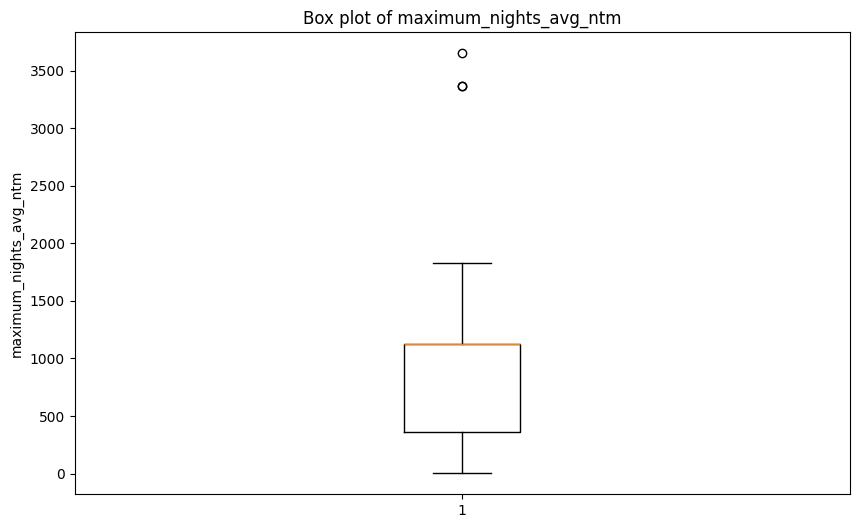


Number of outliers found using Standard Deviation method:
{'host_id': np.int64(25), 'latitude': np.int64(13), 'longitude': np.int64(5), 'host_total_listings_count': np.int64(20), 'accommodates': np.int64(31), 'bathrooms': np.int64(31), 'beds': np.int64(27), 'minimum_nights': np.int64(18), 'maximum_nights': np.int64(3), 'availability_30': np.int64(0), 'availability_60': np.int64(0), 'availability_90': np.int64(0), 'availability_365': np.int64(0), 'number_of_reviews': np.int64(19), 'number_of_reviews_ltm': np.int64(15), 'number_of_reviews_l30d': np.int64(14), 'review_scores_rating': np.int64(13), 'review_scores_accuracy': np.int64(24), 'review_scores_cleanliness': np.int64(27), 'review_scores_checkin': np.int64(24), 'review_scores_communication': np.int64(25), 'review_scores_location': np.int64(27), 'review_scores_value': np.int64(20), 'calculated_host_listings_count': np.int64(23), 'calculated_host_listings_count_entire_homes': np.int64(23), 'calculated_host_listings_count_private_room

In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('id', errors='ignore')

df_std = df.copy()
df_iqr = df.copy()

# Diccionarios para guardar cantidad de outliers por columna
outliers_std_count = {}
outliers_iqr_count = {}

#Boxplots antes de limpieza
print("Box plots before outlier treatment:")
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[col].dropna())
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

# --- Método Desviación Estándar ---
for col in numeric_cols:
    mean, std = df[col].mean(), df[col].std()
    z_scores = (df[col] - mean) / std
    outliers_std_count[col] = np.sum(np.abs(z_scores) > 3)
    # Reemplazar outliers por la media
    df_std.loc[np.abs(z_scores) > 3, col] = mean

# --- Método IQR ---
for col in numeric_cols:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    mask_outliers = (df[col] < lower) | (df[col] > upper)
    outliers_iqr_count[col] = np.sum(mask_outliers)
    # Reemplazar outliers por la mediana
    median = df[col].median()
    df_iqr.loc[mask_outliers, col] = median


print("\nNumber of outliers found using Standard Deviation method:")
print(outliers_std_count)

print("\nNumber of outliers found using IQR method:")
print(outliers_iqr_count)

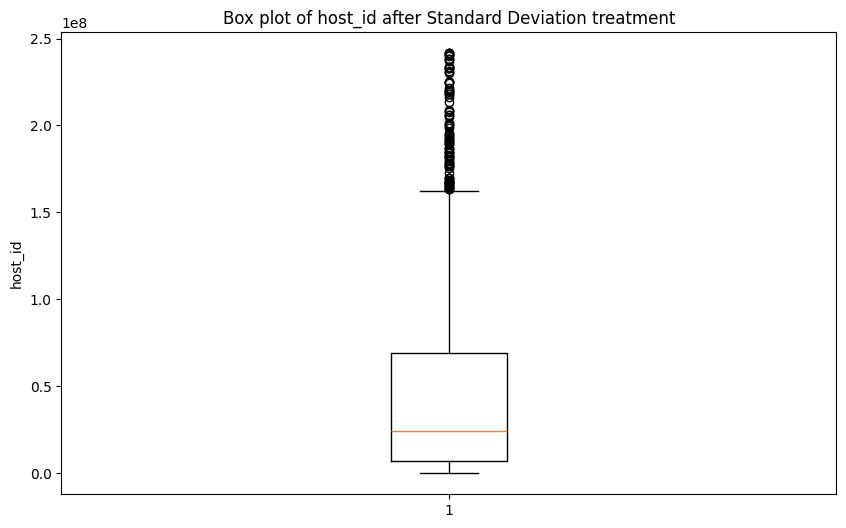

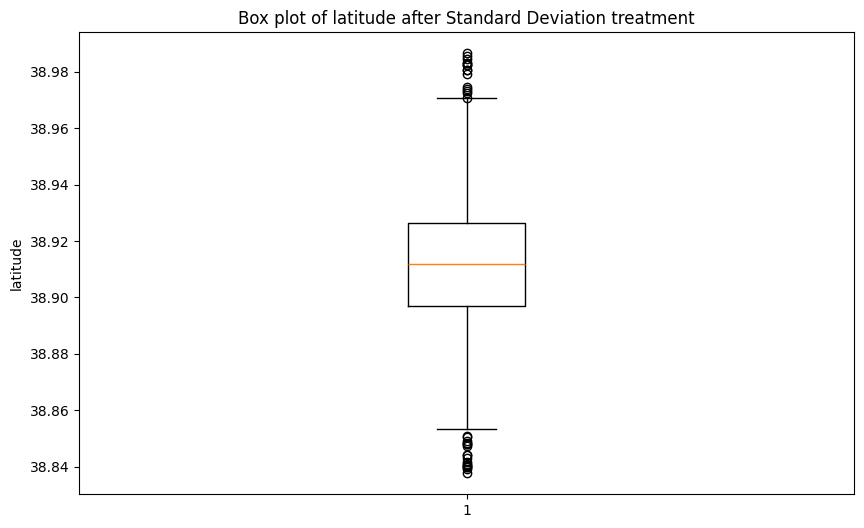

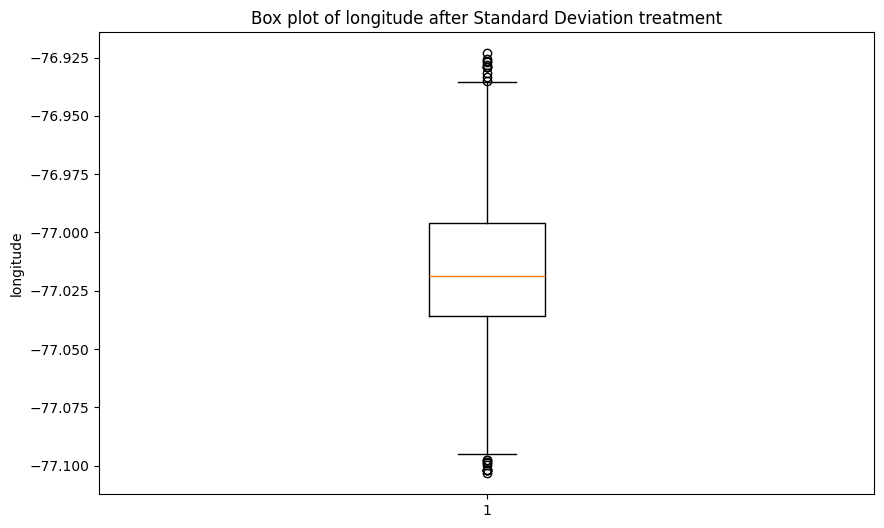

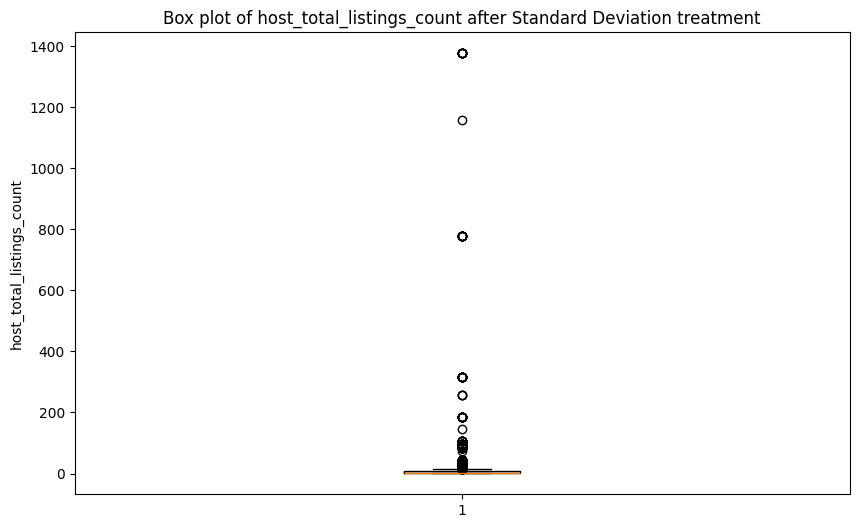

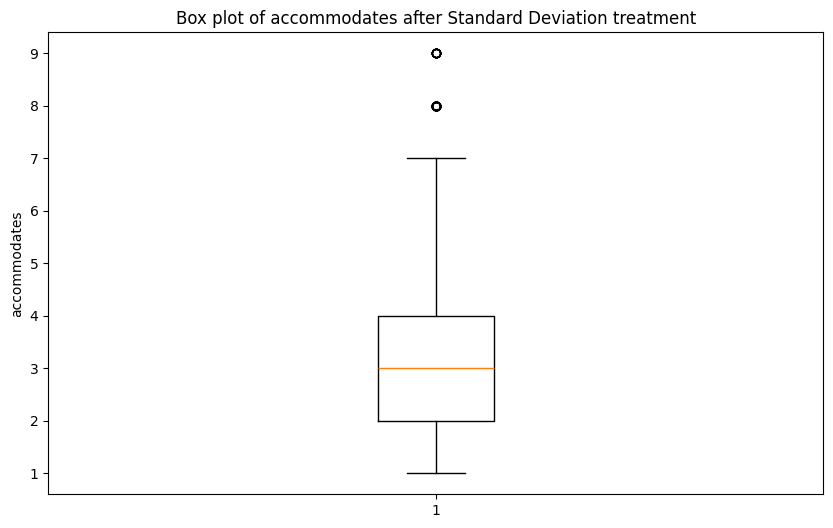

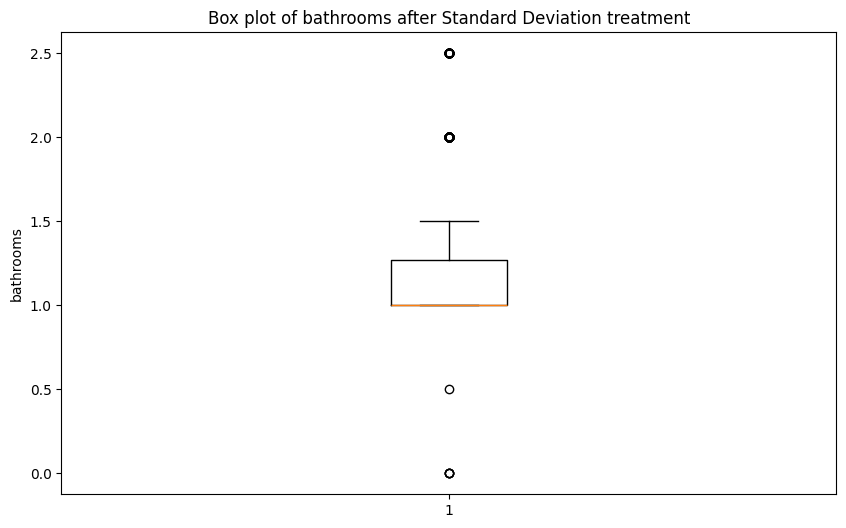

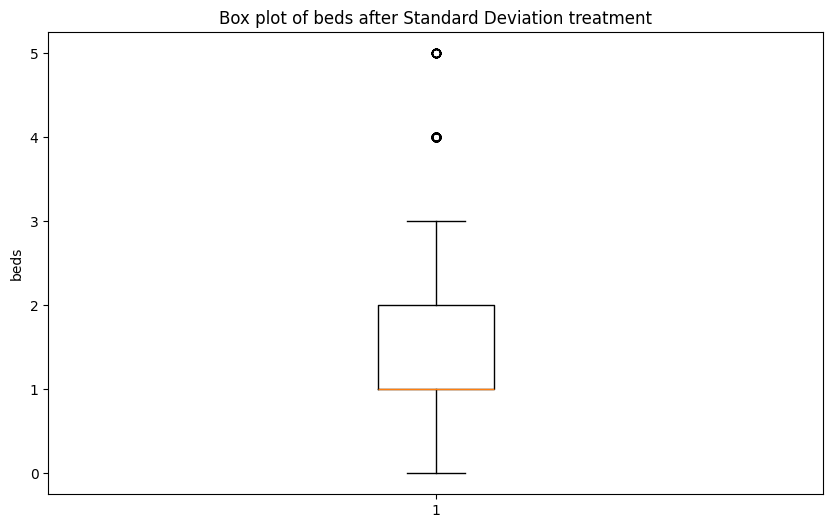

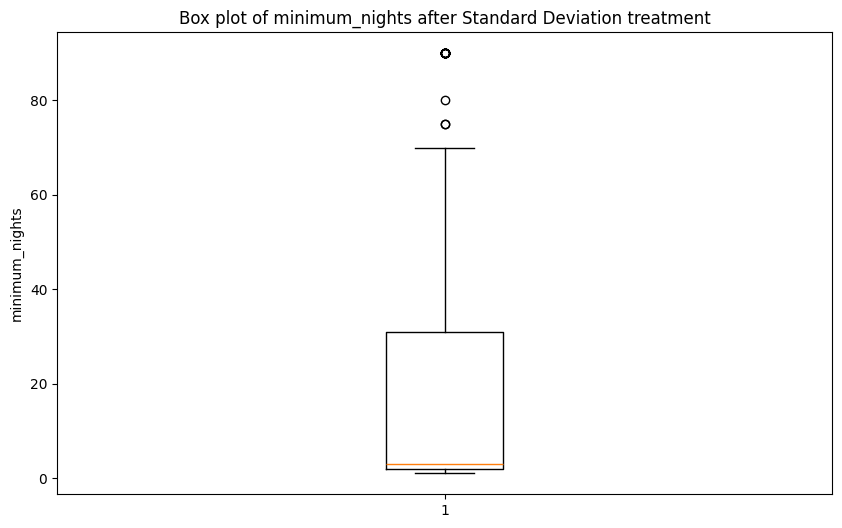

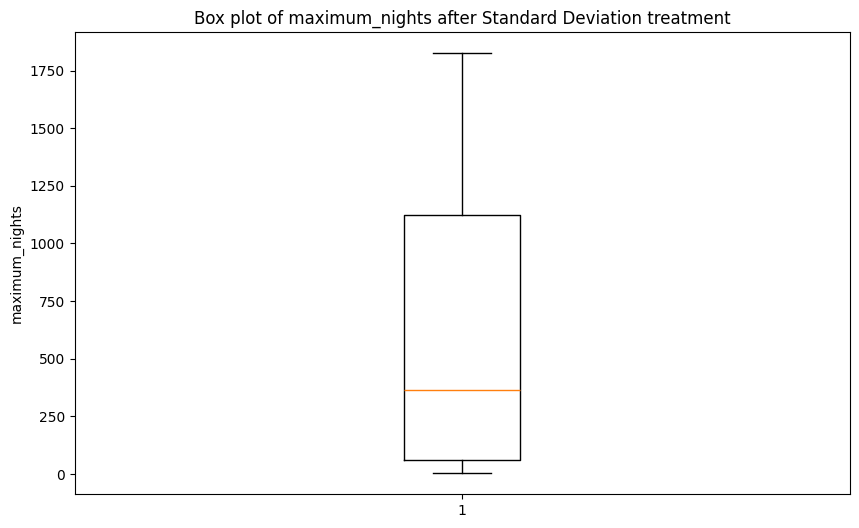

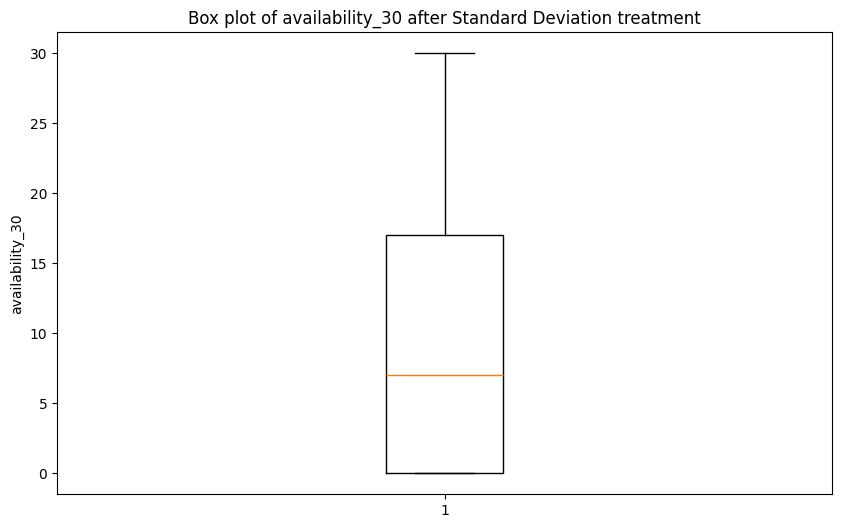

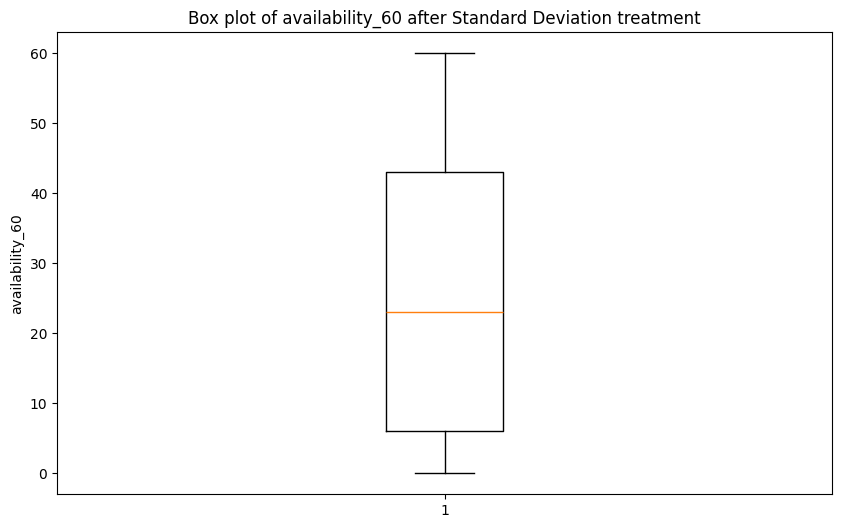

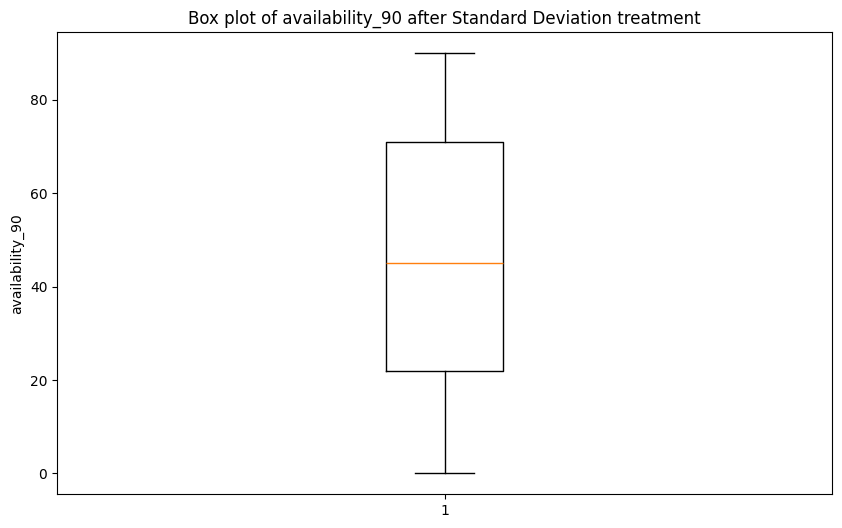

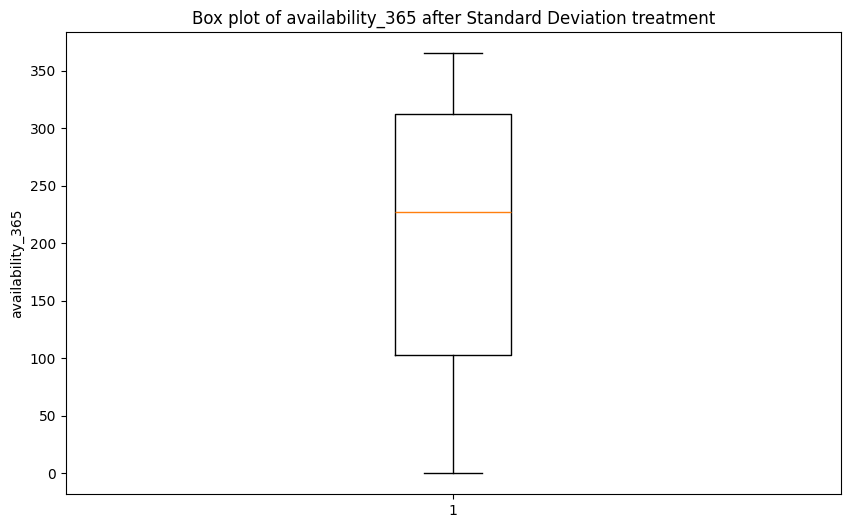

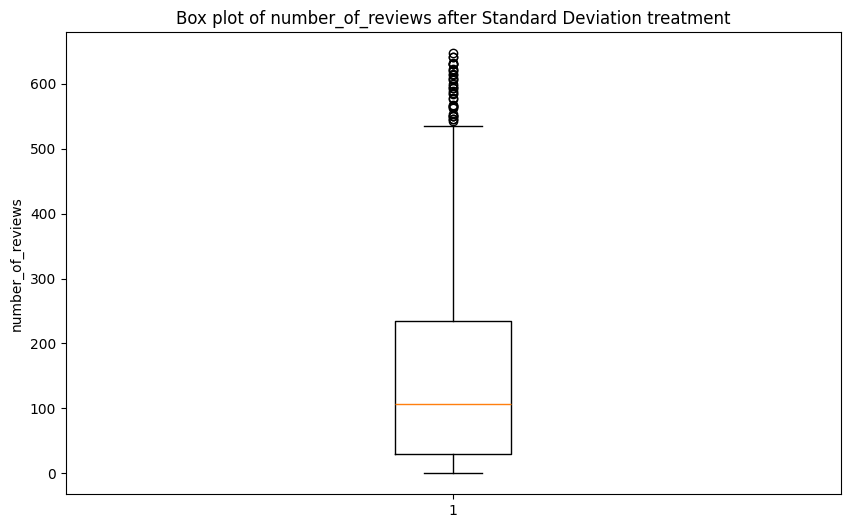

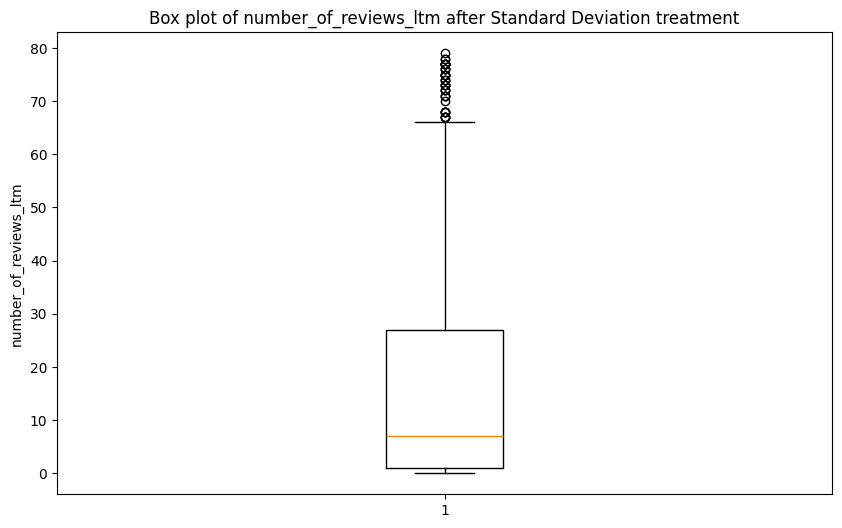

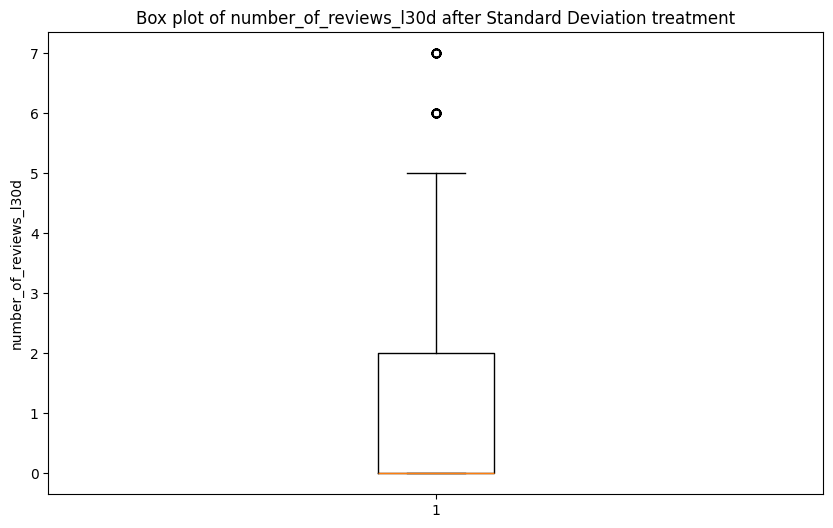

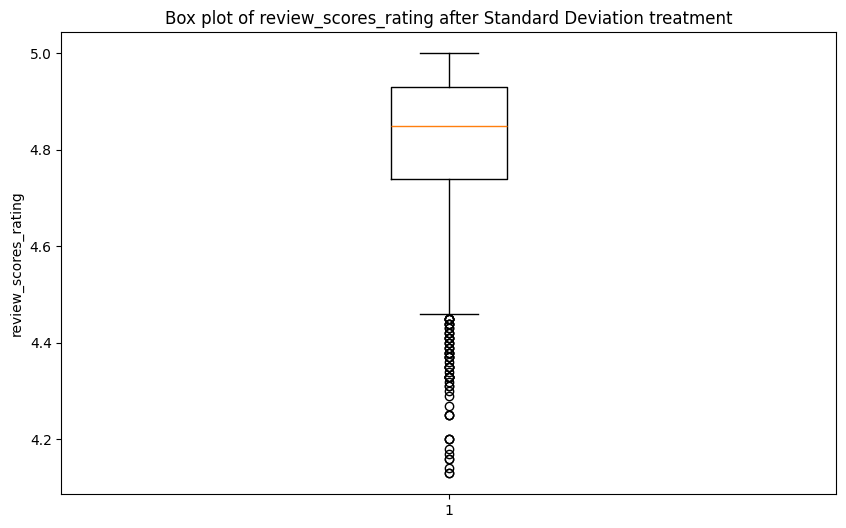

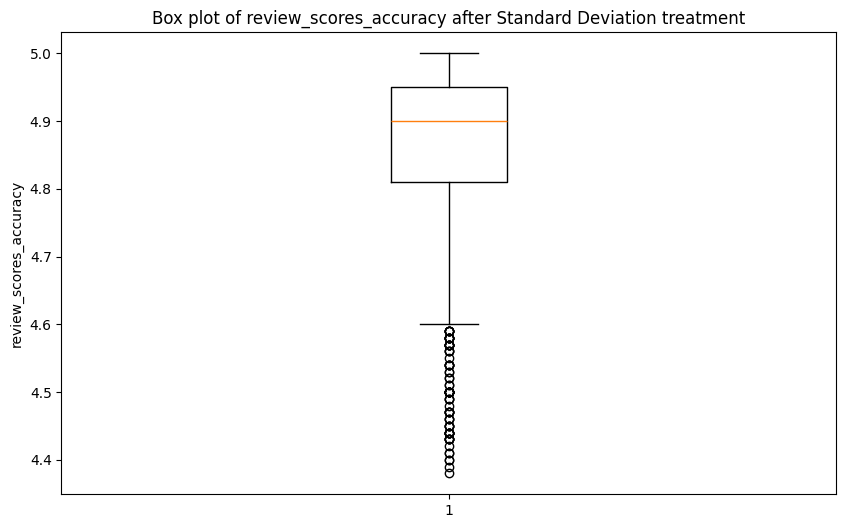

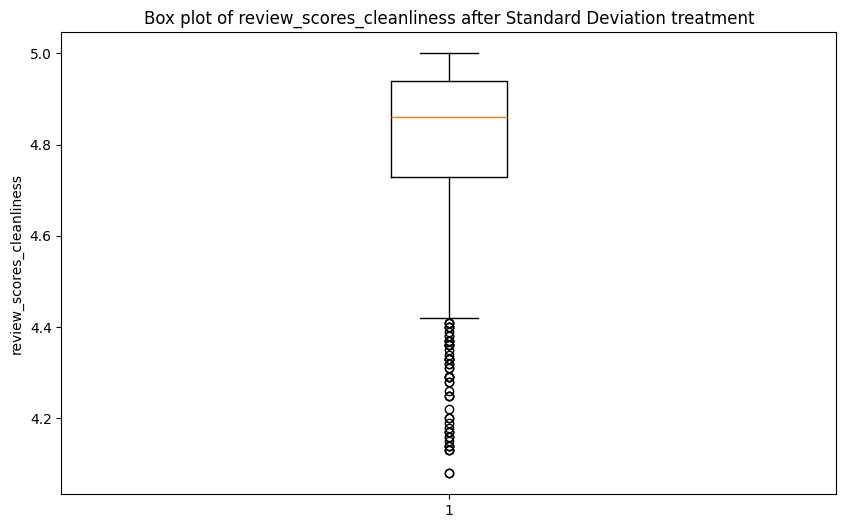

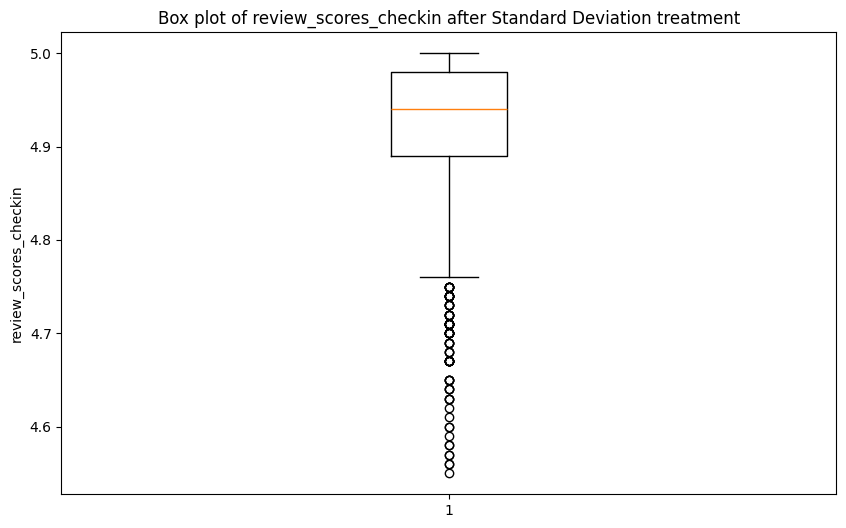

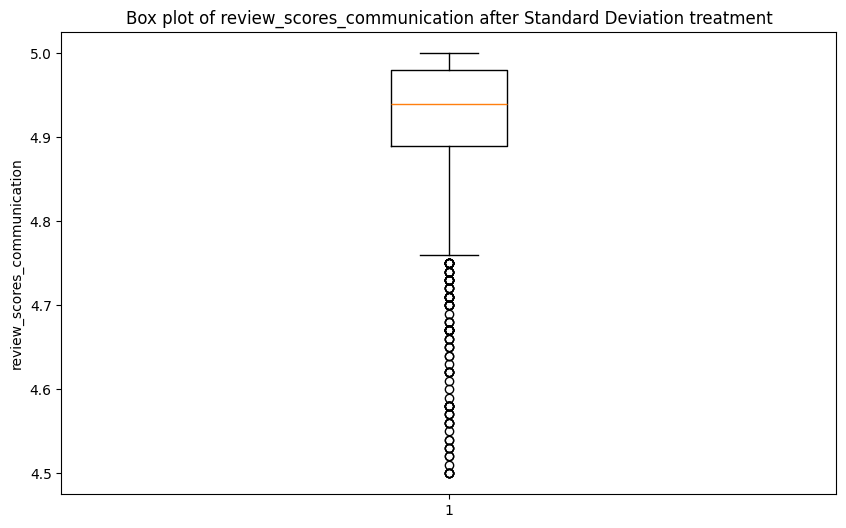

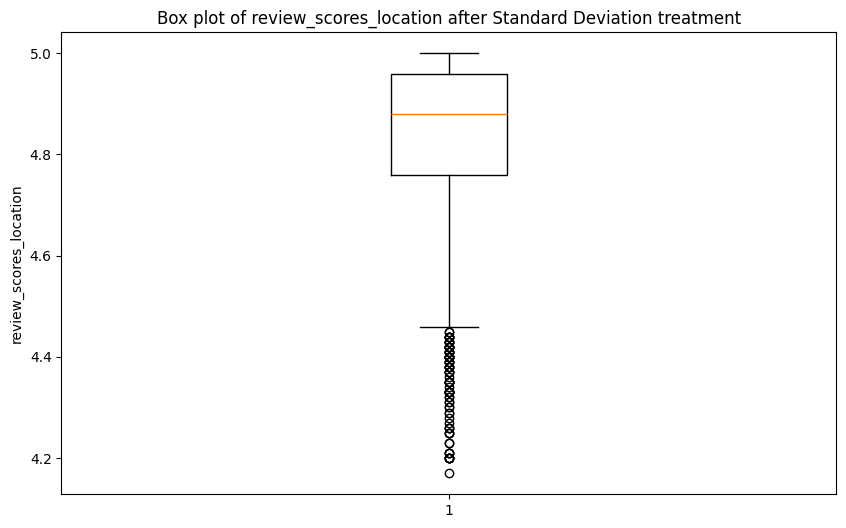

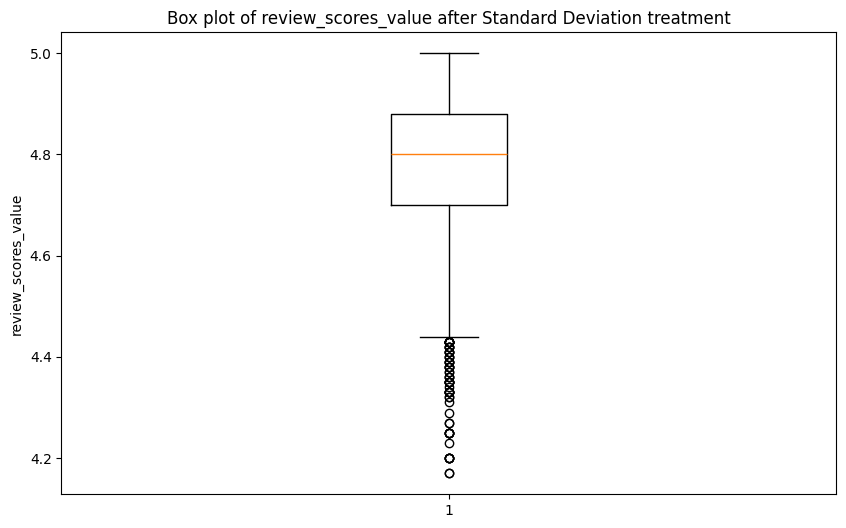

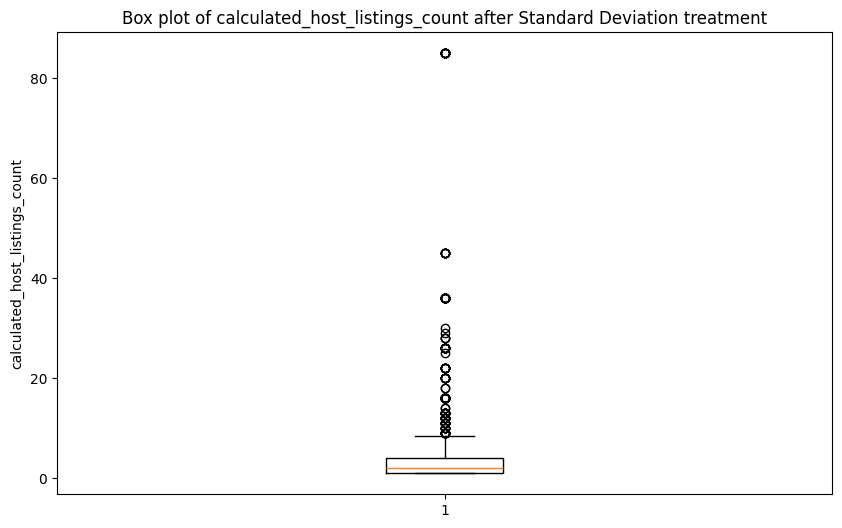

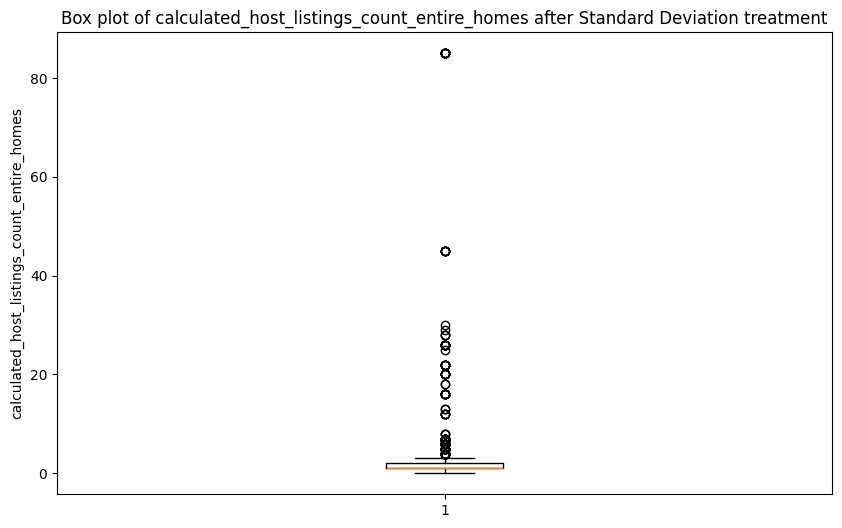

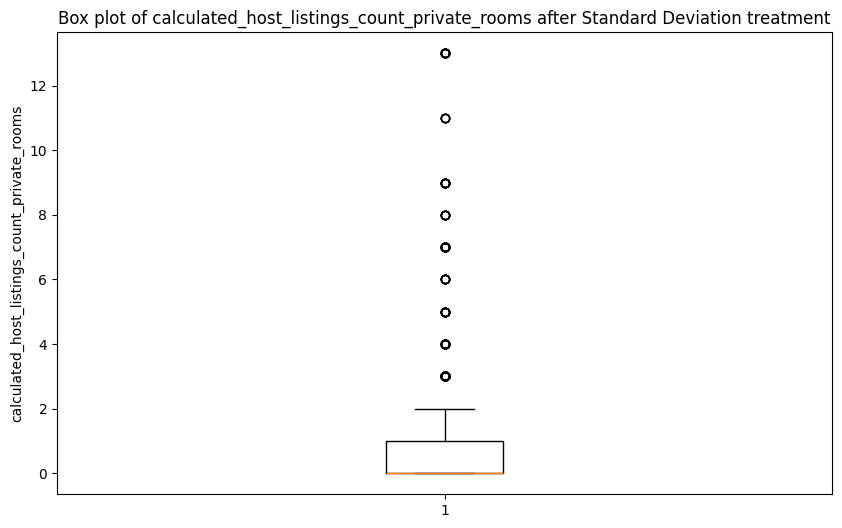

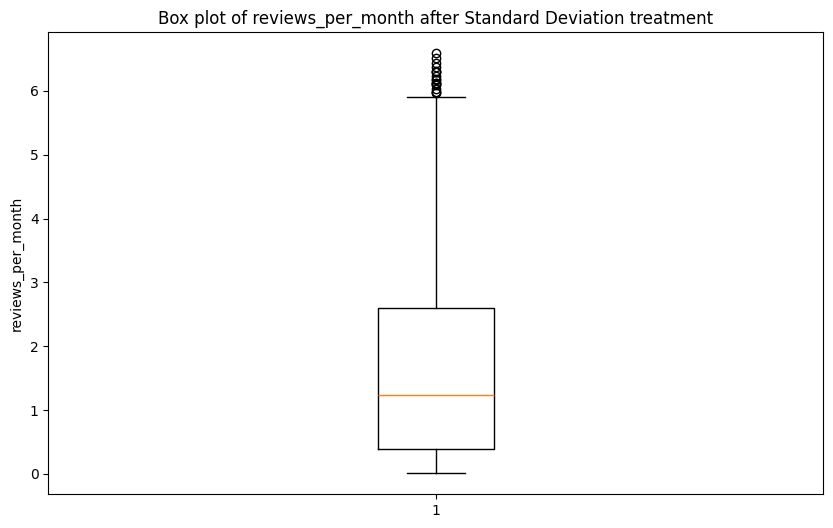

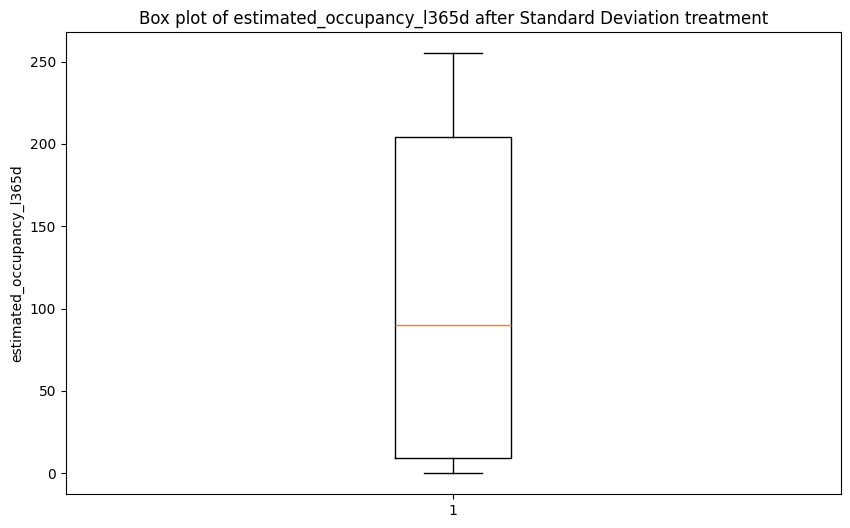

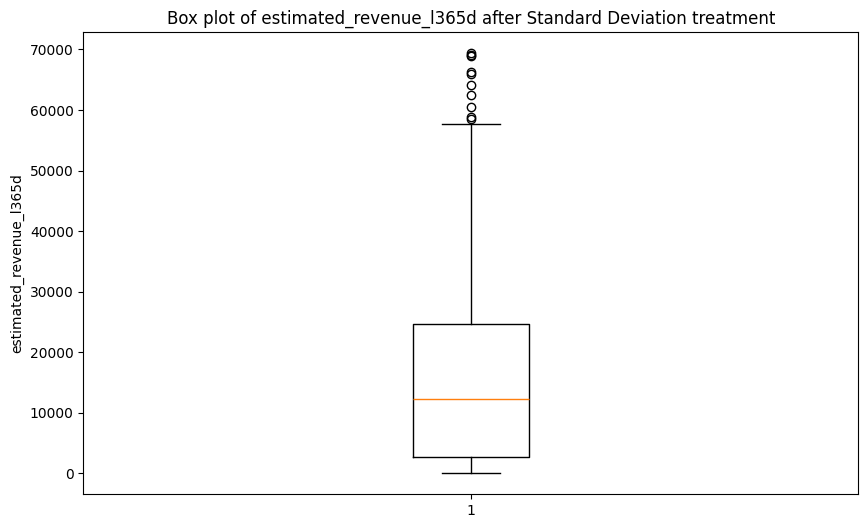

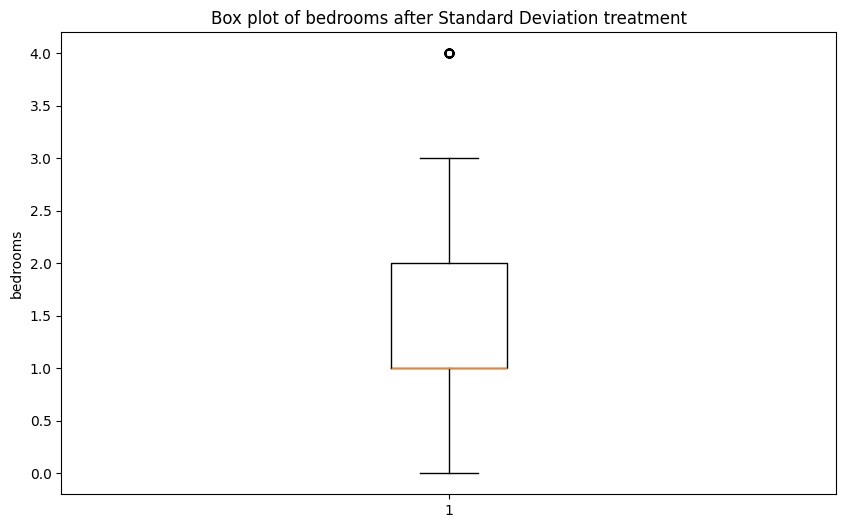

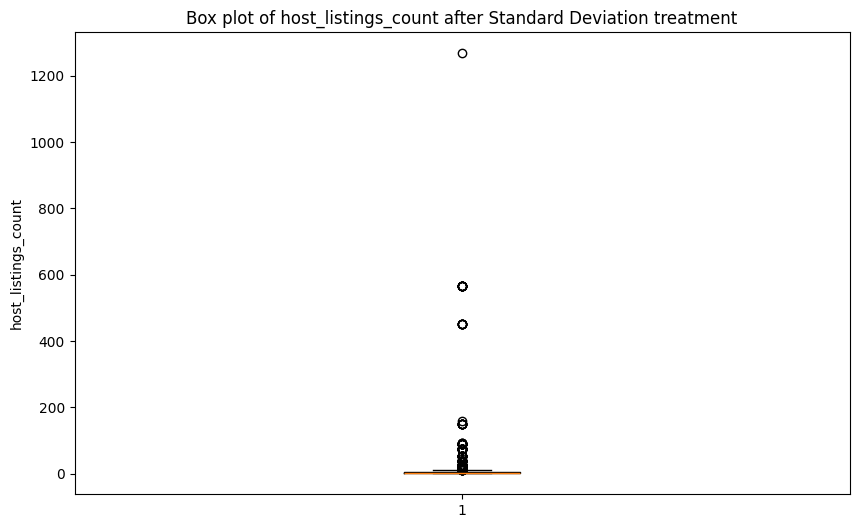

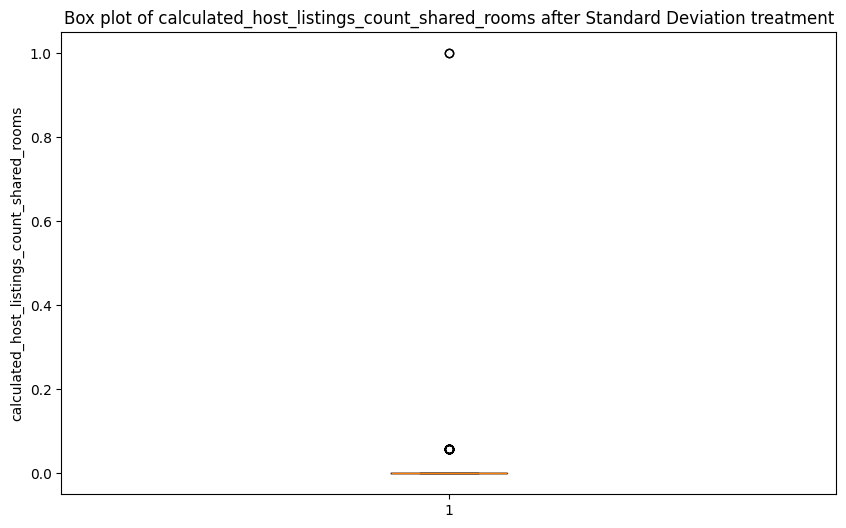

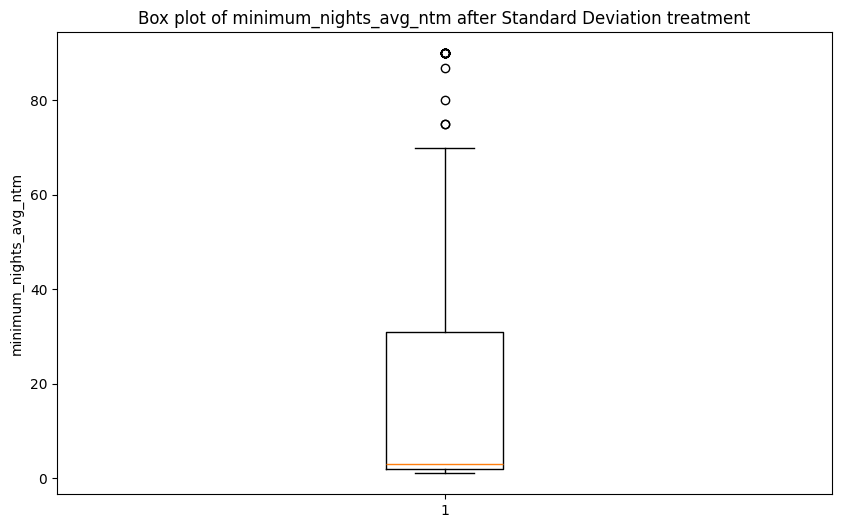

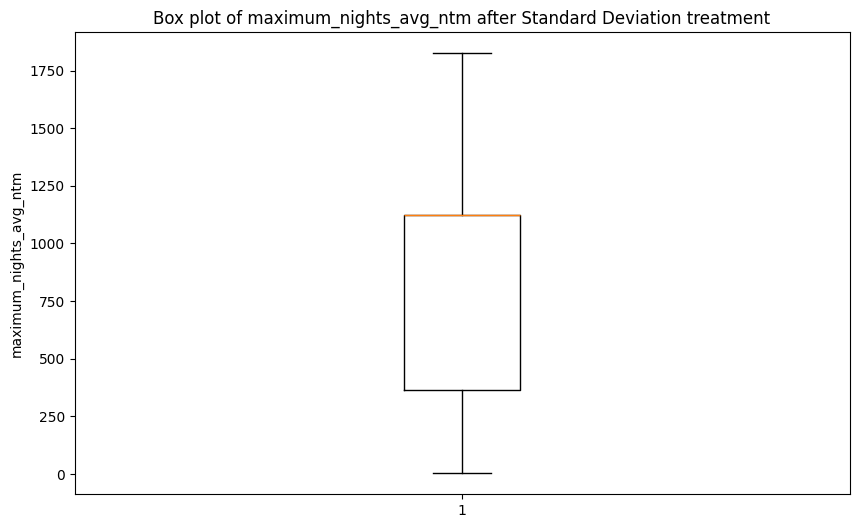


Box plots after IQR outlier treatment:


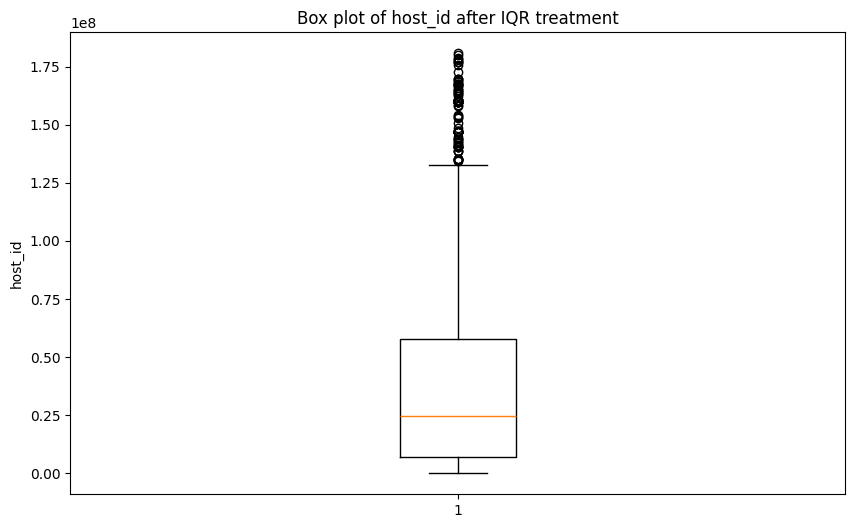

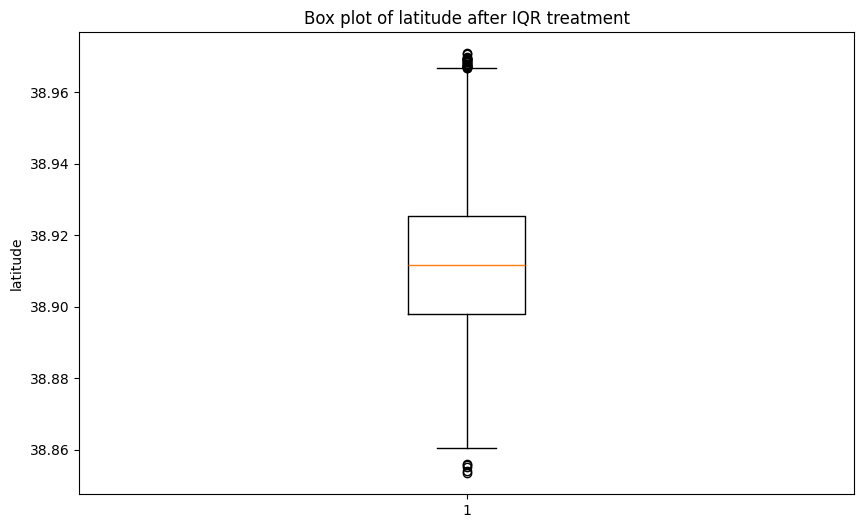

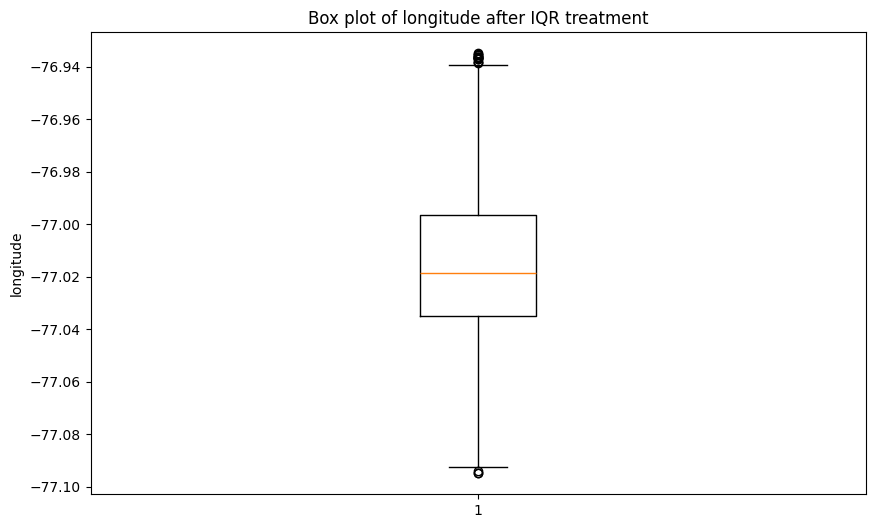

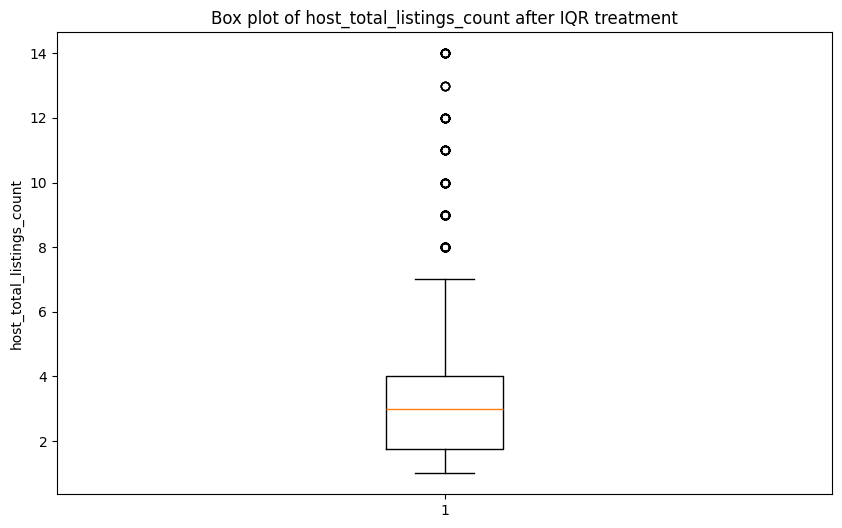

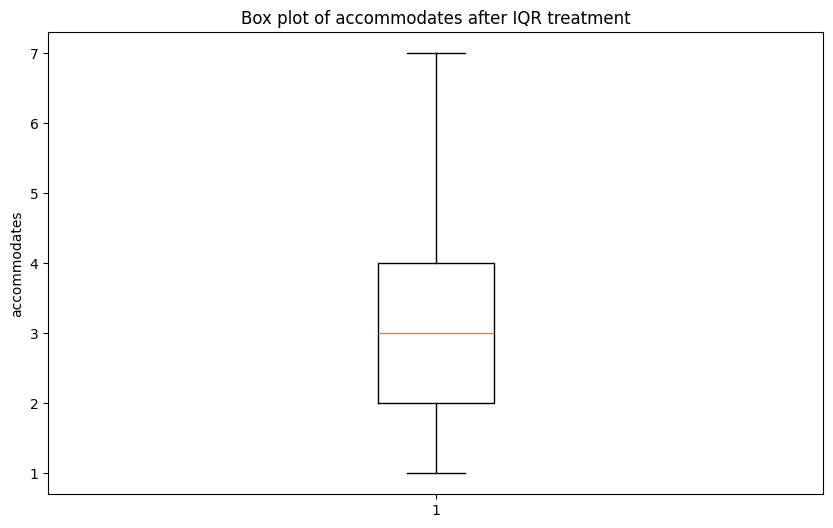

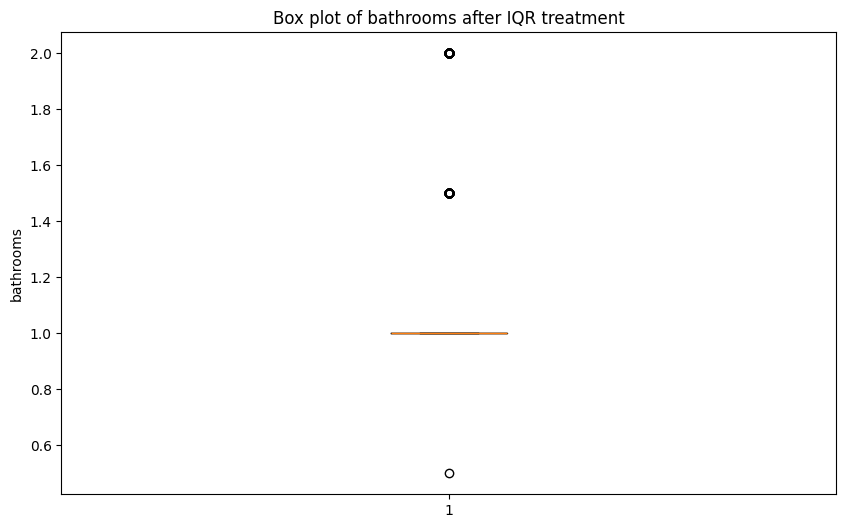

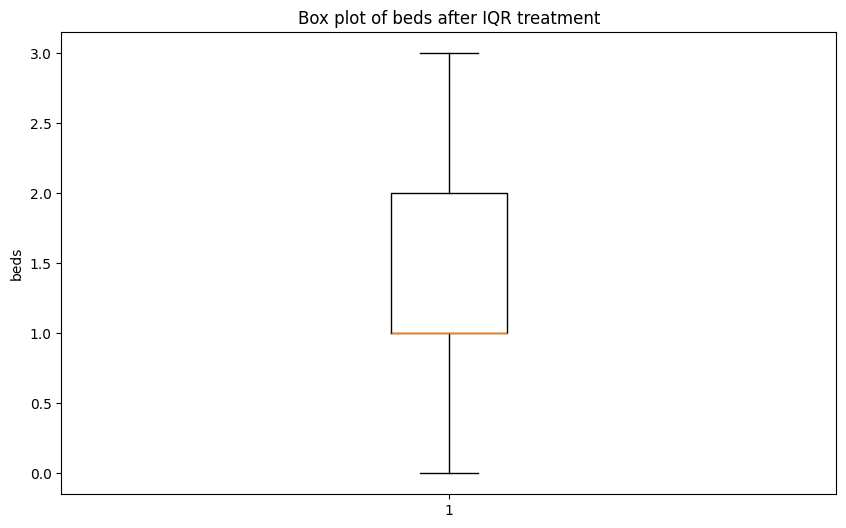

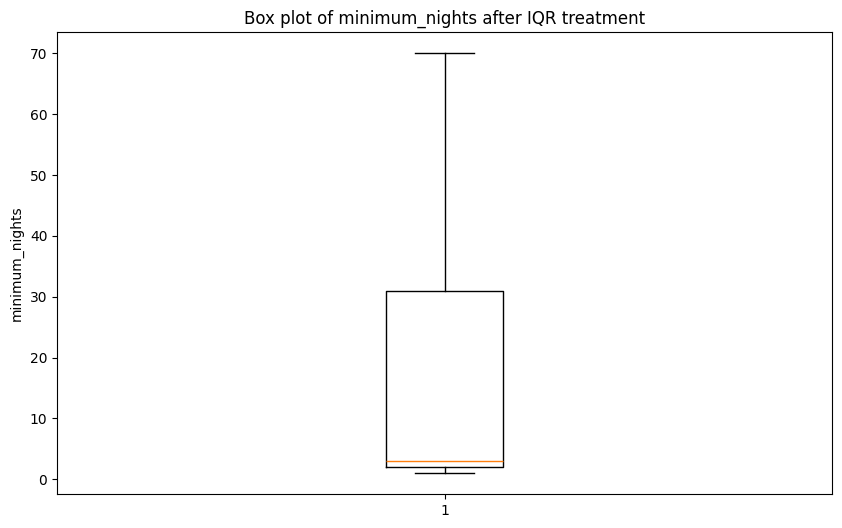

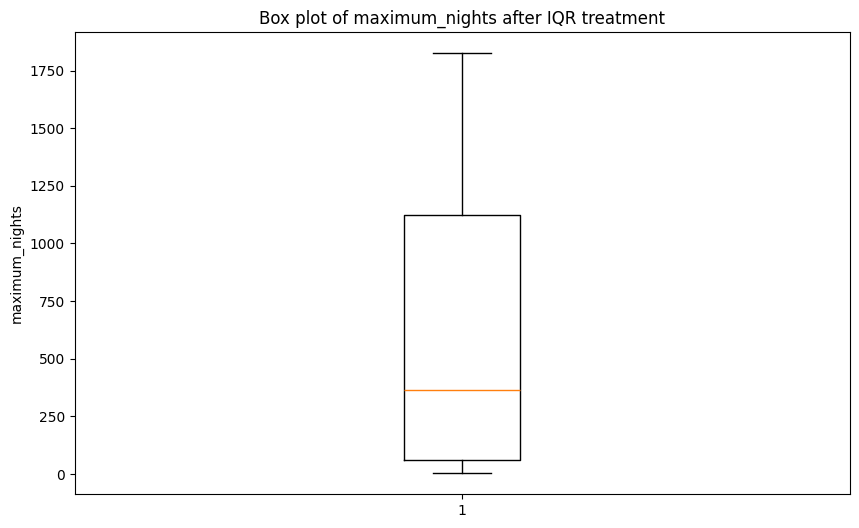

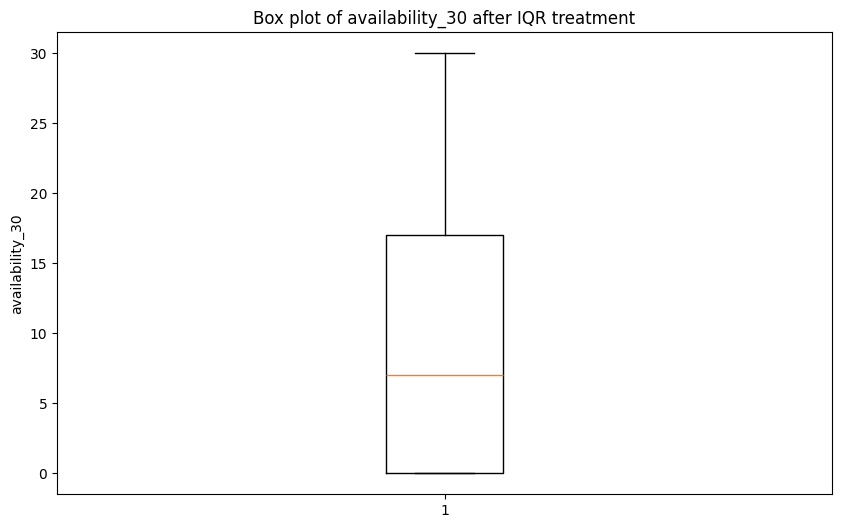

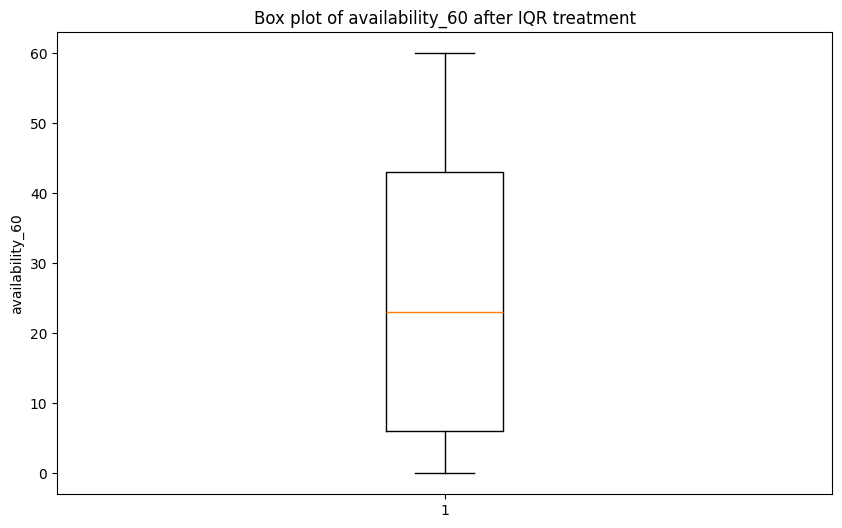

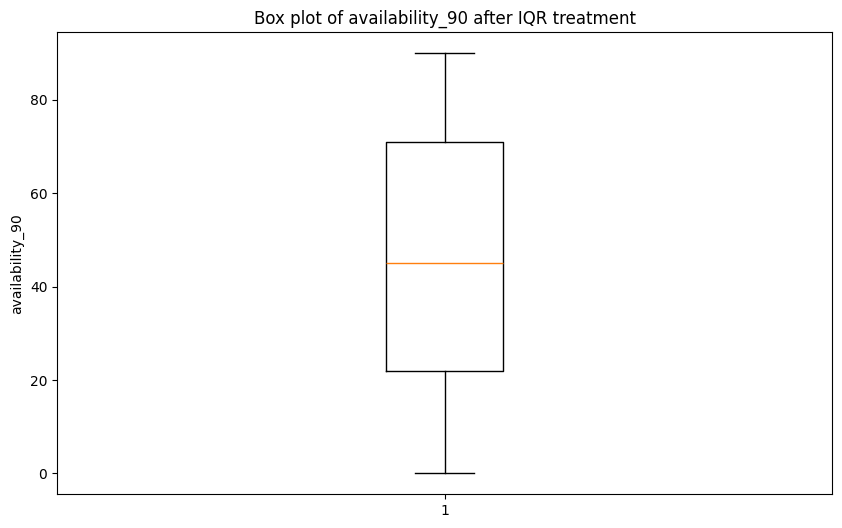

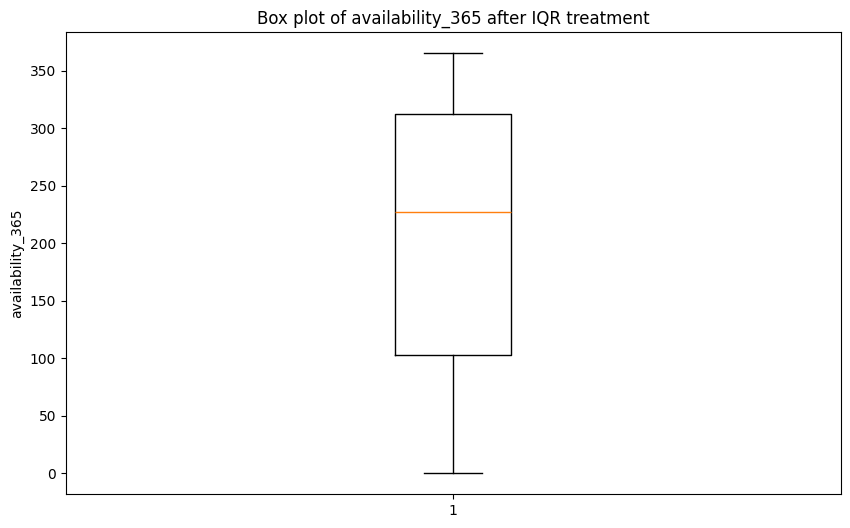

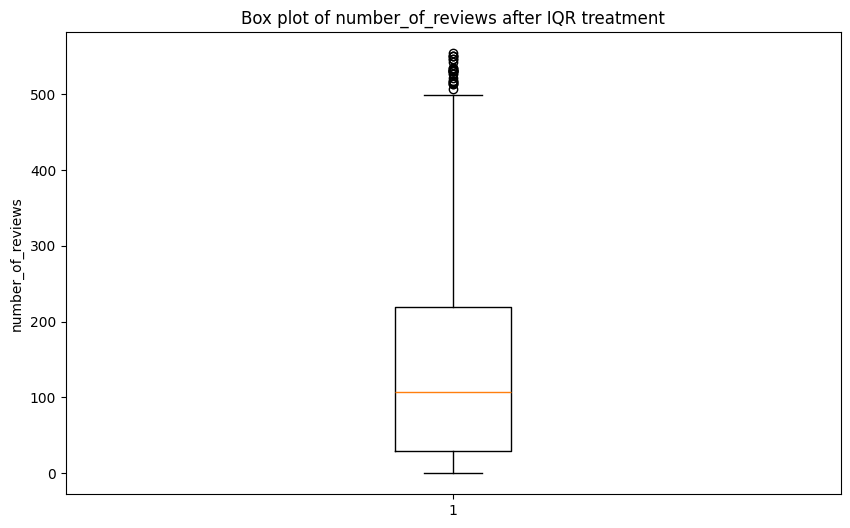

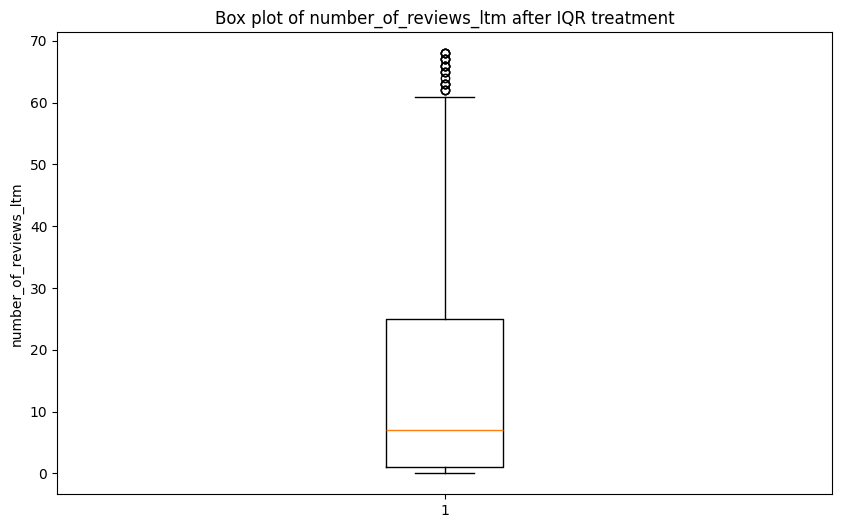

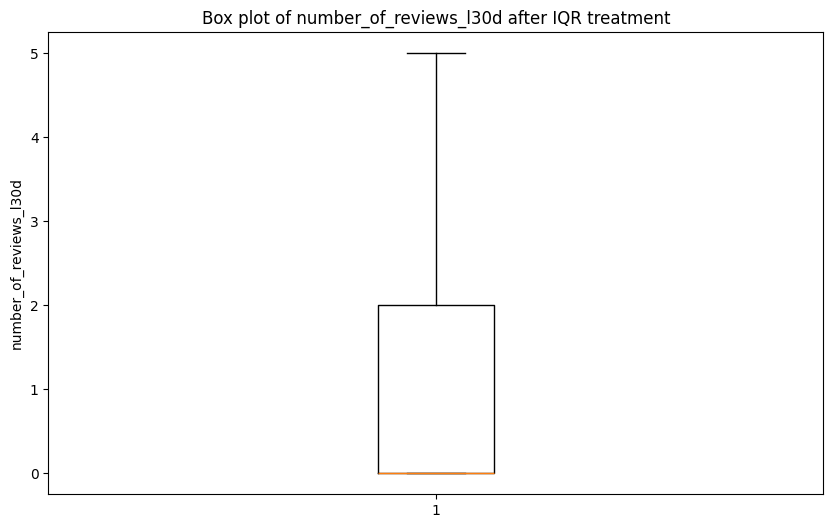

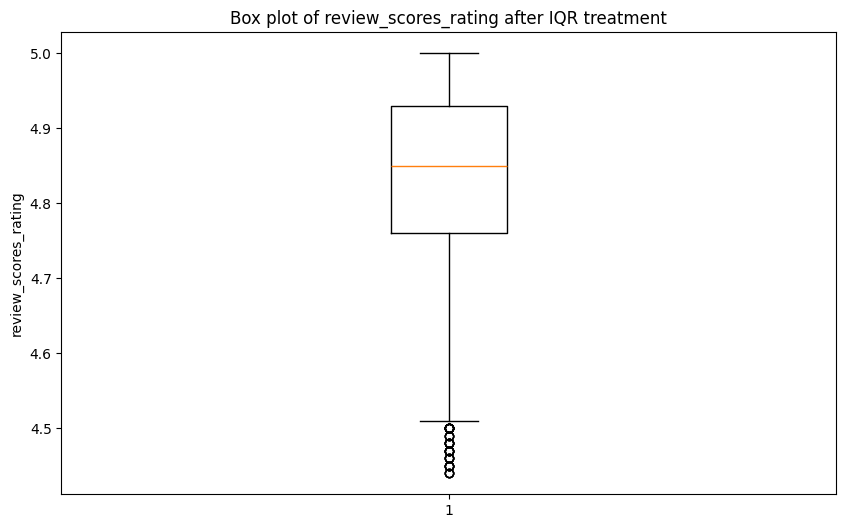

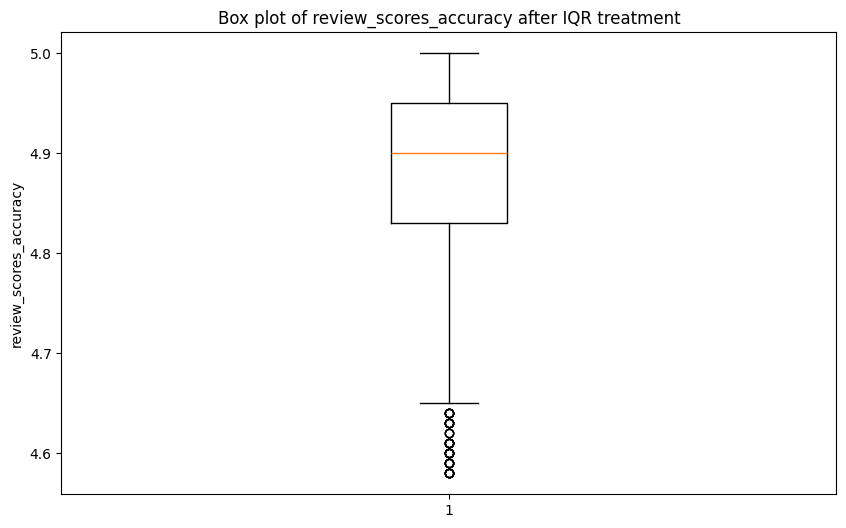

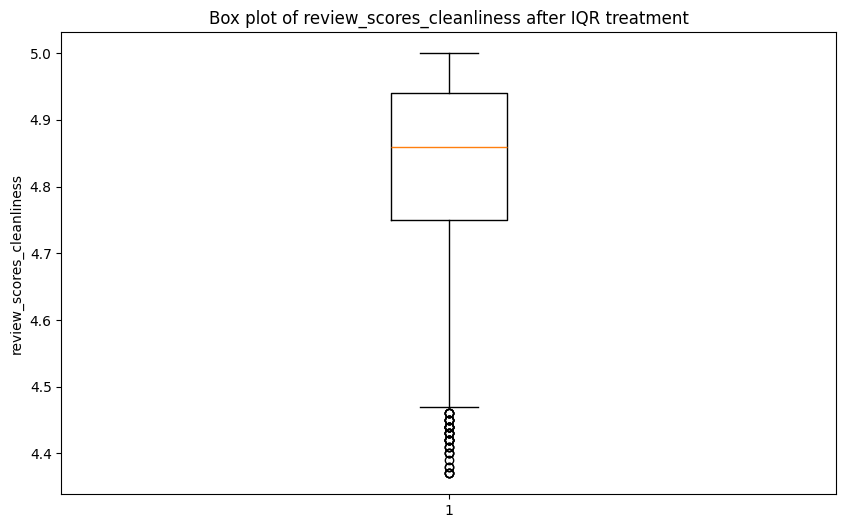

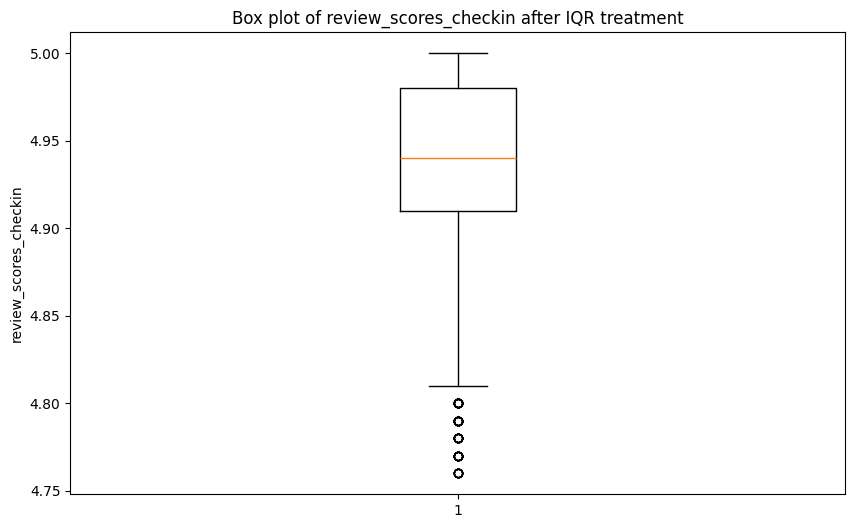

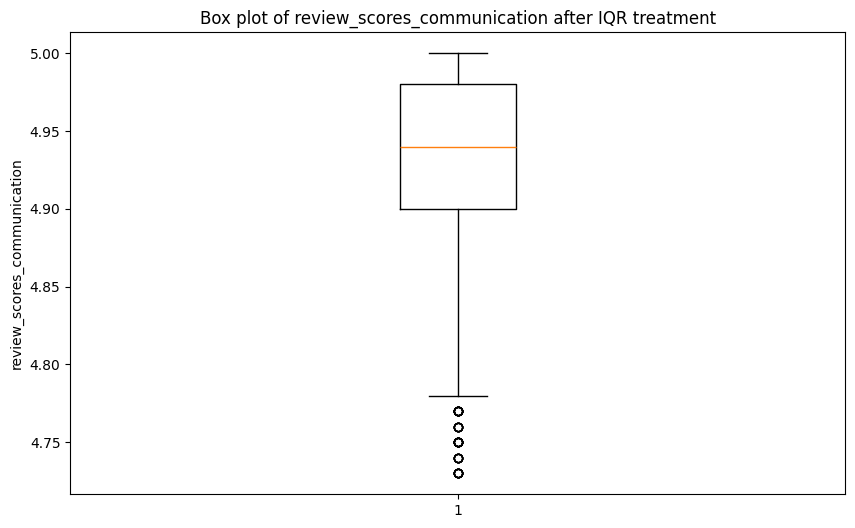

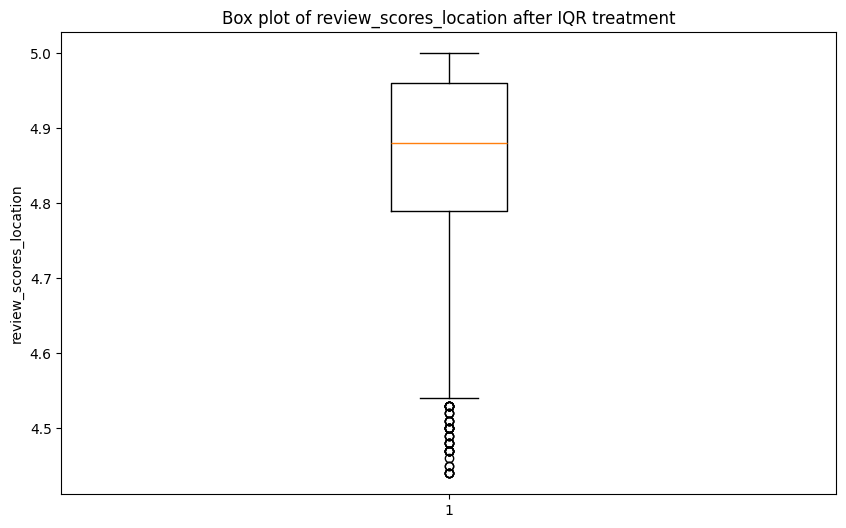

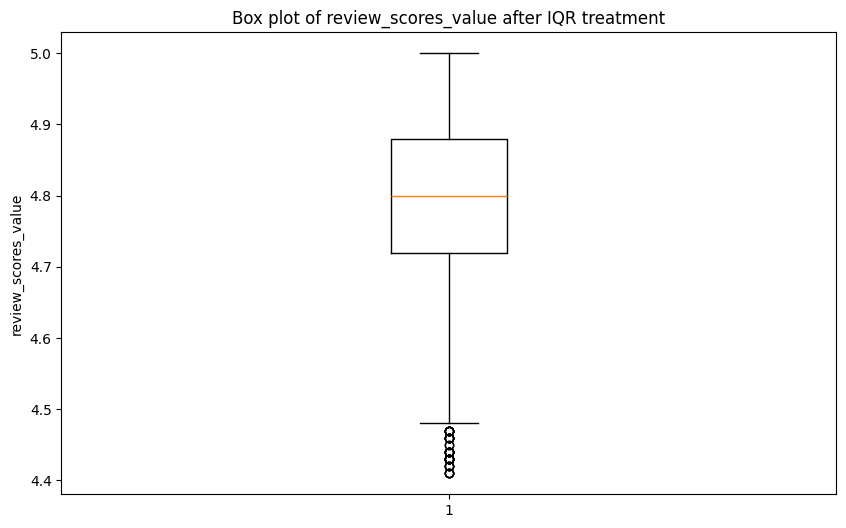

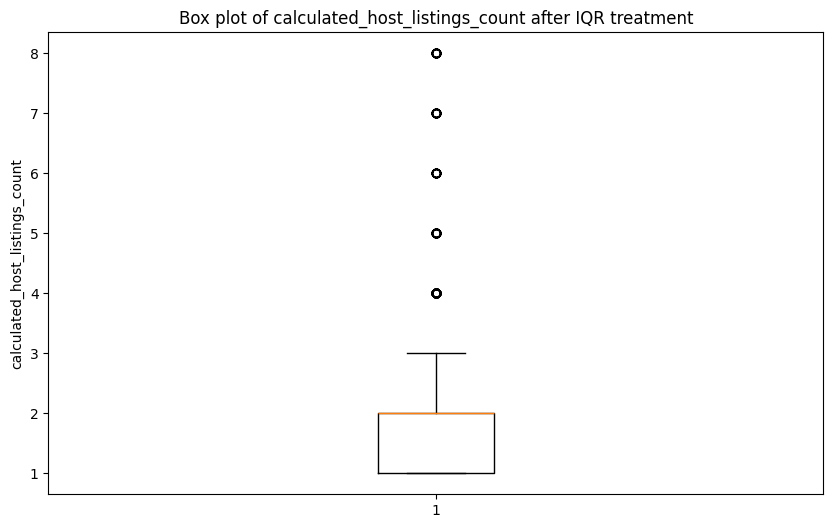

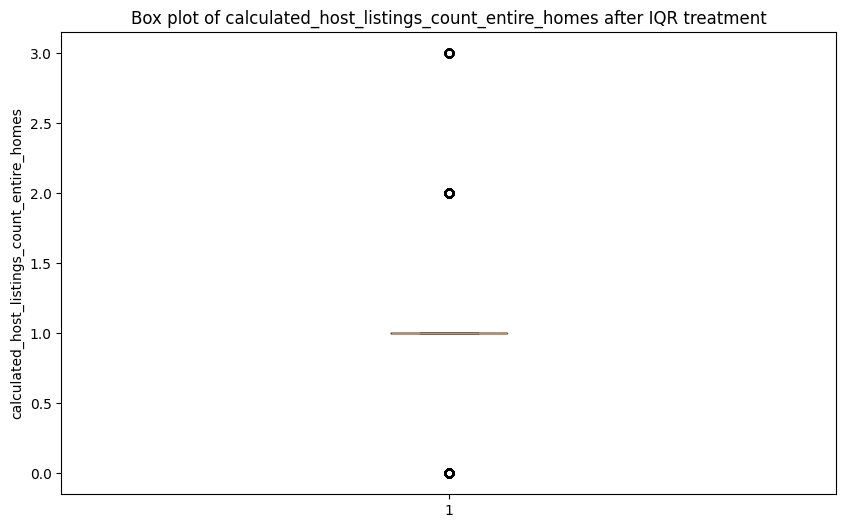

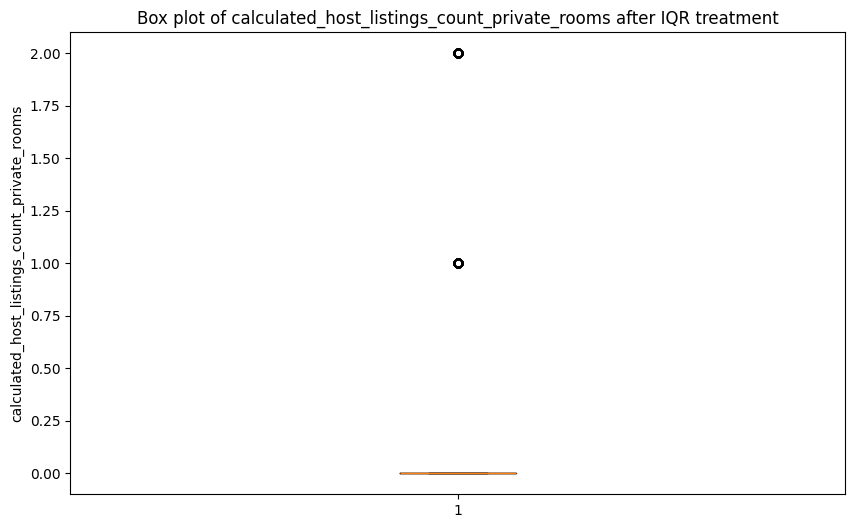

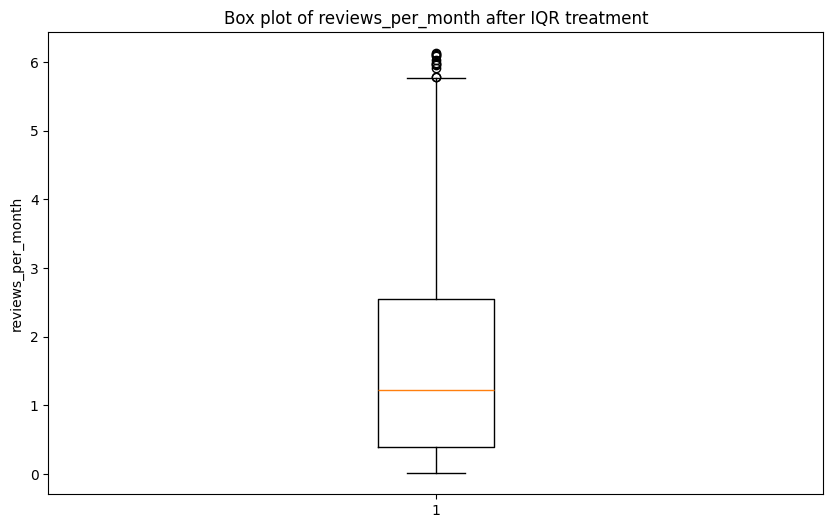

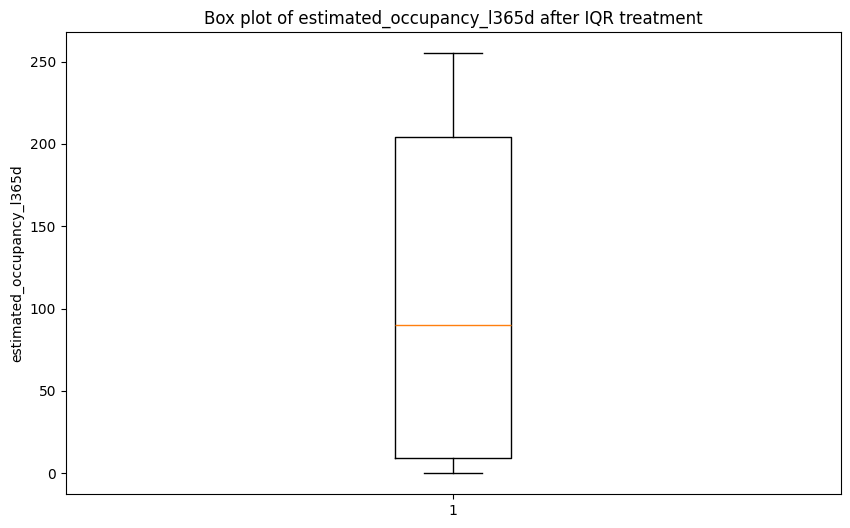

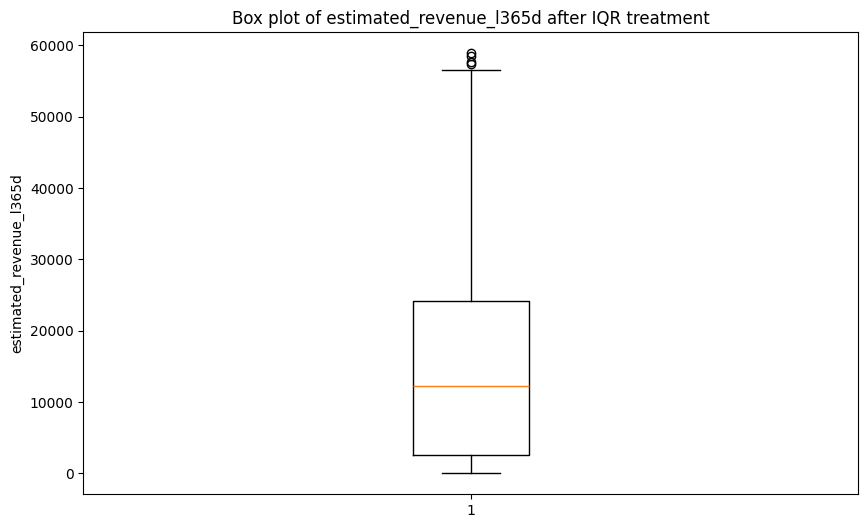

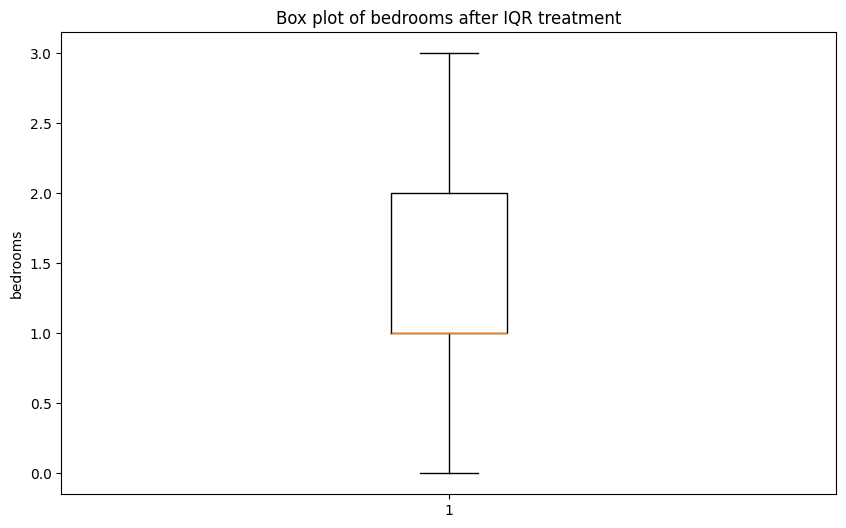

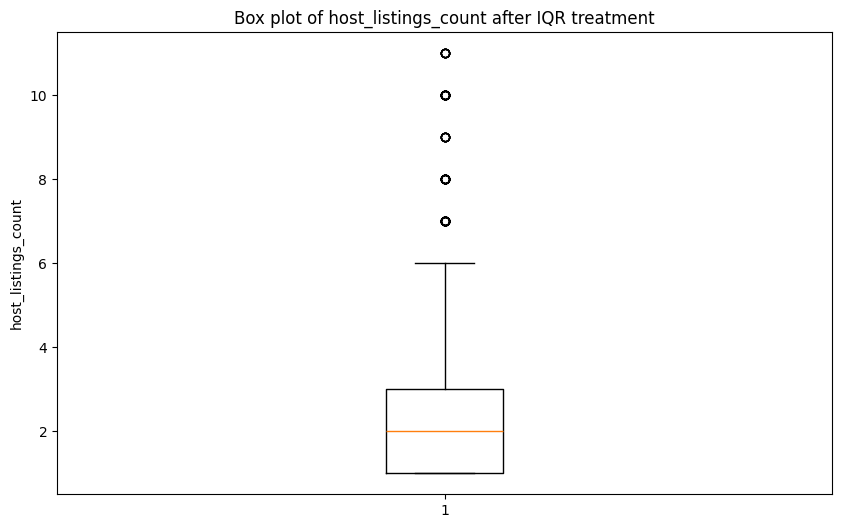

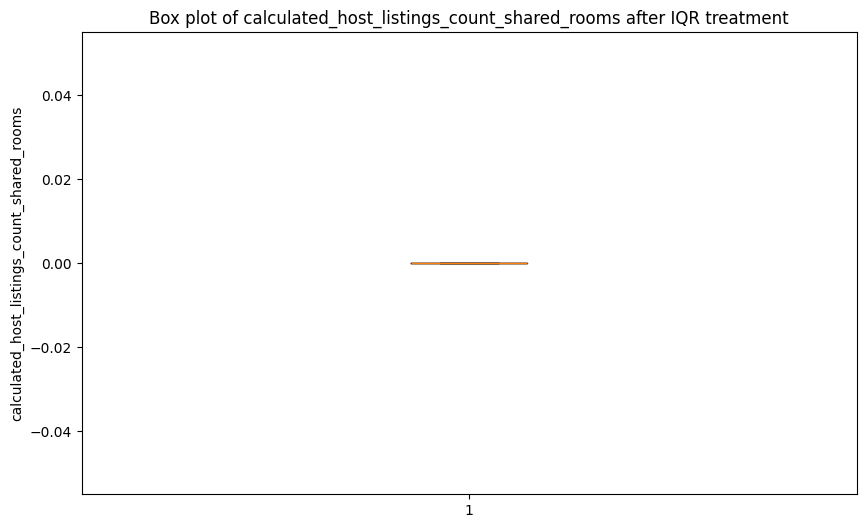

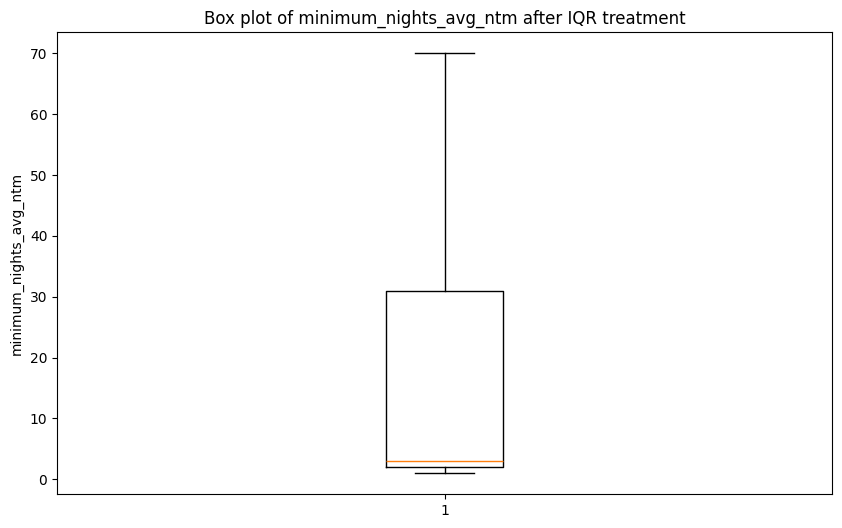

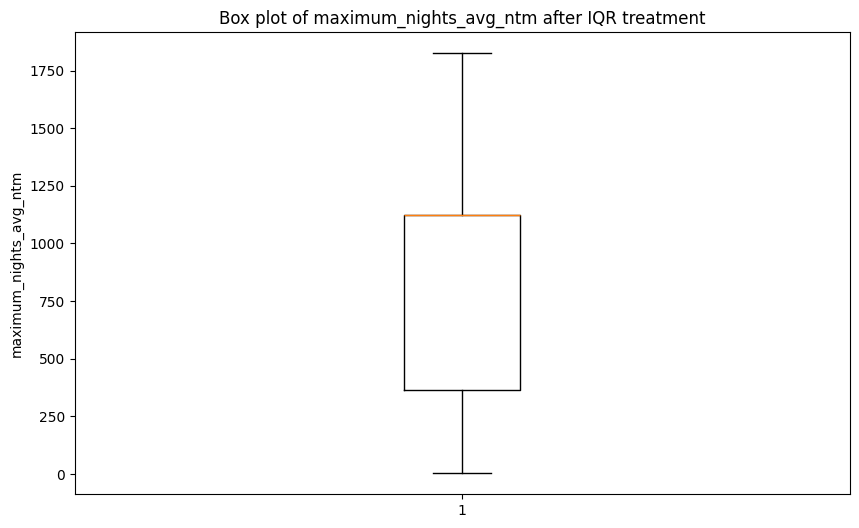

In [9]:
#Boxplot con desviación estándar
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df_std[col].dropna())
    plt.title(f'Box plot of {col} after Standard Deviation treatment')
    plt.ylabel(col)
    plt.show()

# Boxplots después de IQR
print("\nBox plots after IQR outlier treatment:")
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df_iqr[col].dropna())
    plt.title(f'Box plot of {col} after IQR treatment')
    plt.ylabel(col)
    plt.show()

In [10]:
outliers_summary = pd.DataFrame({
    'Columna': numeric_cols,
    'Outliers_IQR': [outliers_iqr_count[col] for col in numeric_cols],
    'Outliers_ZScore': [outliers_std_count[col] for col in numeric_cols]
})

#Porcentajes
outliers_summary['Total_Registros'] = len(df)
outliers_summary['Porcentaje_IQR'] = (outliers_summary['Outliers_IQR'] / outliers_summary['Total_Registros']) * 100
outliers_summary['Porcentaje_ZScore'] = (outliers_summary['Outliers_ZScore'] / outliers_summary['Total_Registros']) * 100

# Rango  IQR
for col in numeric_cols:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers_summary.loc[outliers_summary['Columna'] == col, 'Rango_IQR'] = f"[{lower:.2f}, {upper:.2f}]"

# Reemplazar nulos
outliers_summary['Método_Detección'] = 'IQR'
outliers_summary['Método_Imputación'] = 'MEDIAN'
outliers_summary['Valor_Reemplazo'] = [df[col].median() for col in numeric_cols]

# AReemplazar nulos con media
outliers_summary_std_replacement = pd.DataFrame({
    'Columna': numeric_cols,
    'Outliers_IQR': [outliers_iqr_count[col] for col in numeric_cols],
    'Outliers_ZScore': [outliers_std_count[col] for col in numeric_cols]
})
outliers_summary_std_replacement['Total_Registros'] = len(df)
outliers_summary_std_replacement['Porcentaje_IQR'] = (outliers_summary_std_replacement['Outliers_IQR'] / outliers_summary_std_replacement['Total_Registros']) * 100
outliers_summary_std_replacement['Porcentaje_ZScore'] = (outliers_summary_std_replacement['Outliers_ZScore'] / outliers_summary_std_replacement['Total_Registros']) * 100
for col in numeric_cols:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers_summary_std_replacement.loc[outliers_summary_std_replacement['Columna'] == col, 'Rango_IQR'] = f"[{lower:.2f}, {upper:.2f}]"
outliers_summary_std_replacement['Método_Detección'] = 'Standard Deviation'
outliers_summary_std_replacement['Método_Imputación'] = 'MEAN'
outliers_summary_std_replacement['Valor_Reemplazo'] = [df[col].mean() for col in numeric_cols]

outliers_summary = pd.concat([outliers_summary, outliers_summary_std_replacement], ignore_index=True)


display(outliers_summary)

,Columna,Outliers_IQR,Outliers_ZScore,Total_Registros,Porcentaje_IQR,Porcentaje_ZScore,Rango_IQR,Método_Detección,Método_Imputación,Valor_Reemplazo
0,host_id,90,25,1497,6.012024,1.670007,"[-97725409.50, 181196136.50]",IQR,MEDIAN,2.459174e+07
1,latitude,45,13,1497,3.006012,0.868403,"[38.85, 38.97]",IQR,MEDIAN,3.891173e+01
2,longitude,25,5,1497,1.670007,0.334001,"[-77.10, -76.93]",IQR,MEDIAN,-7.701859e+01
3,host_total_listings_count,243,20,1497,16.232465,1.336005,"[-6.12, 14.88]",IQR,MEDIAN,3.000000e+00
4,accommodates,81,31,1497,5.410822,2.070808,"[-1.00, 7.00]",IQR,MEDIAN,3.000000e+00
...,...,...,...,...,...,...,...,...,...,...
63,bedrooms,62,19,1497,4.141617,1.269205,"[-0.50, 3.50]",Standard Deviation,MEAN,1.407950e+00
64,host_listings_count,222,12,1497,14.829659,0.801603,"[-5.00, 11.00]",Standard Deviation,MEAN,5.397193e+01
65,calculated_host_listings_count_shared_rooms,22,20,1497,1.469606,1.336005,"[0.00, 0.00]",Standard Deviation,MEAN,5.815508e-02
66,minimum_nights_avg_ntm,37,19,1497,2.471610,1.269205,"[-41.50, 74.50]",Standard Deviation,MEAN,1.516263e+01


In [11]:
display(outliers_summary)

,Columna,Outliers_IQR,Outliers_ZScore,Total_Registros,Porcentaje_IQR,Porcentaje_ZScore,Rango_IQR,Método_Detección,Método_Imputación,Valor_Reemplazo
0,host_id,90,25,1497,6.012024,1.670007,"[-97725409.50, 181196136.50]",IQR,MEDIAN,2.459174e+07
1,latitude,45,13,1497,3.006012,0.868403,"[38.85, 38.97]",IQR,MEDIAN,3.891173e+01
2,longitude,25,5,1497,1.670007,0.334001,"[-77.10, -76.93]",IQR,MEDIAN,-7.701859e+01
3,host_total_listings_count,243,20,1497,16.232465,1.336005,"[-6.12, 14.88]",IQR,MEDIAN,3.000000e+00
4,accommodates,81,31,1497,5.410822,2.070808,"[-1.00, 7.00]",IQR,MEDIAN,3.000000e+00
...,...,...,...,...,...,...,...,...,...,...
63,bedrooms,62,19,1497,4.141617,1.269205,"[-0.50, 3.50]",Standard Deviation,MEAN,1.407950e+00
64,host_listings_count,222,12,1497,14.829659,0.801603,"[-5.00, 11.00]",Standard Deviation,MEAN,5.397193e+01
65,calculated_host_listings_count_shared_rooms,22,20,1497,1.469606,1.336005,"[0.00, 0.00]",Standard Deviation,MEAN,5.815508e-02
66,minimum_nights_avg_ntm,37,19,1497,2.471610,1.269205,"[-41.50, 74.50]",Standard Deviation,MEAN,1.516263e+01


In [13]:
df_std.to_csv('desviacion_estandar.csv', index=False)
df_iqr.to_csv('iqr.csv', index=False)

print("Dataframes with outliers treated by Standard Deviation and IQR methods have been exported to 'df_standard_deviation_outliers_treated.csv' and 'df_iqr_outliers_treated.csv' respectively.")

Dataframes with outliers treated by Standard Deviation and IQR methods have been exported to 'df_standard_deviation_outliers_treated.csv' and 'df_iqr_outliers_treated.csv' respectively.
